In [2]:
import pandas as pd
import numpy as np
import warnings as wrn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

wrn.filterwarnings('ignore')

In [3]:
## Load the csv file ## | Start
df=pd.read_csv('Leads.csv',sep=',',encoding='ISO-8859-1')
## Load the csv file ## | End

In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

<center> We can see lots of columns have null values , lets check them out </center>

In [5]:
def getNullperc(df):
    perdf = (df.isnull().sum()/len(df) * 100).to_frame().sort_values(by=0,ascending=False).rename(columns={0:'Percentage'})
    return perdf

In [6]:
getNullperc(df)

,Percentage
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199


<center> The <b> Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Score, Asymmetrique Activity Score, Tags, Lead Profile, What matters most to you in choosing a course  </b> etc. are some of the columns having huge set of null values </center>

In [7]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Cleaning

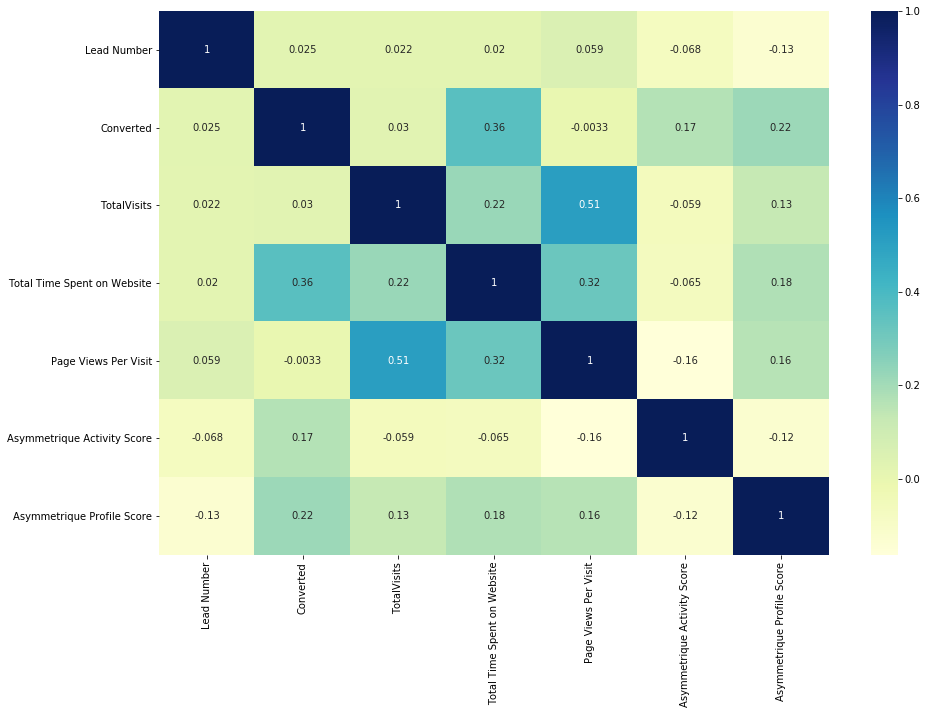

In [8]:
## Plot the correlation among the variables | Start
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
## Plot the correlation among the variables | End

<center> No real high correaltion between the variables </center>


In [9]:
## Remove the unnecessary columns | Start
df=df.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
## Remove the unnecessary columns | End

The above columns is already represented by Asymmetrique Activity Index & Asymmetrique Profile Index

In [10]:
# Check the column value distribution for all the categorical variables | Start
cols=list(df.columns)
for col in cols:
    if(df[col].dtype=='object' and col!='Prospect ID'):
        print(col)
        print("\n------------\n")
        print(df[col].value_counts())
        print("\n------------\n")
        print("\n\n")
# Check the column value distribution for all the categorical variables | End

Lead Origin

------------

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

------------




Lead Source

------------

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

------------




Do Not Email

------------

No     8506
Yes     734
Name: Do Not Email, dtype: int64

------------




Do Not Call

------------

No     923

<center> Now we can see the following columns almost all or actually all the columns have same values and will not have any value in our analysis as there is no variations at all. </center>
<ul>
    <li>
        I agree to pay the amount through cheque - 9240 -- No
    </li>
    <li>
        Get updates on DM Content - 9240 -- No
    </li>
    <li>
        Update me on Supply Chain Content - 9240 -- No
    </li>
    <li>
        Receive More Updates About Our Courses - 9240 -- No
    </li>
    <li>
        Through Recommendations - 9233 -- No, 7 - Yes
    </li>
    <li>
        Digital Advertisement - 9236 -- No, 4 - Yes
    </li>
    <li>
        Newspaper - 9239 -- No, 1 - Yes
    </li>
    <li>
        X Education Forums - 9239 -- No, 1 - Yes
    </li>
    <li>
        Newspaper Article - 9238 -- No, 2 - Yes
    </li>
    <li>
        Magazine - 9240 -- No
    </li>
    <li>
        Search - 9226 -- No, 14 -- Yes
    </li>
    <li>
        Do Not Call - 9238 -- No, 2 -- Yes
    </li>
</ul>

We can drop these columns as they will not help us in the analysis much as there is not much variations accross the data

In [11]:
# Drop the columns which have minimum/no variations accross the dataset | Start
df=df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search','Do Not Call'],axis=1)
# Drop the columns which have minimum/no variations accross the dataset | End

In [12]:
## Drop the Prospect ID as we have Lead Number to identify each Lead### | Start
df=df.drop('Prospect ID',axis=1)
## Drop the Prospect ID as we have Lead Number to identify each Lead### | End

In [13]:
df.shape

(9240, 22)

In [14]:
getNullperc(df)

,Percentage
Lead Quality,51.590909
Asymmetrique Profile Index,45.649351
Asymmetrique Activity Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
How did you hear about X Education,23.885281
Specialization,15.562771


In [15]:
# Lets check the uniqueness of the data | Start
df['Lead Number'].nunique()
# Lets check the uniqueness of the data | End

9240

Columns like Lead Quality,Asymmetrique Profile Index,Asymmetrique Activity Index,Tags have more than 30% missing values, hence we drop the columns as we will not have any sense of analyis on these columns

In [16]:
## Drop the columns with more than 30% of Null values ## | Start
df=df.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags'],axis=1)
## Drop the columns with more than 30% of Null values ## | End

In [17]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
How did you hear about X Education,23.885281
Specialization,15.562771
City,15.367965
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719


In [18]:
df.shape

(9240, 18)

Now lets check each columns individually

In [19]:
# Check the column value distribution for Lead Profile | Start
df['Lead Profile'].value_counts()
# Check the column value distribution for Lead Profile | End

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

We can see the Lead Profile seems to have meaningful values in less then 2500 rows, others are either Null or Select, imputation of Null and 'Select' values with 'Unknown' would make a biased set of data if we really impute this column, hence we drop this column.

In [20]:
# Drop the column - Lead Profile | Start
df=df.drop('Lead Profile',axis=1)
# Drop the column - Lead Profile | End

In [21]:
# Check the column value distribution - What matters most to you in choosing a course | Start
df['What matters most to you in choosing a course'].value_counts()/len(df)*100
# Check the column value distribution - What matters most to you in choosing a course | End

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

For the column 'What matters most to you in choosing a course' we see that more than 70% people have selected for 'Better Career Prospects' and <b> only 0.021645% and 0.010823% </b> for other 2 options, rest of the data has Null Values, so this would also not be of any use for our analysis, hence we drop this column 

In [22]:
# Drop the column - What matters most to you in choosing a course | Start
df=df.drop('What matters most to you in choosing a course',axis=1)
# Drop the column - What matters most to you in choosing a course | End

In [23]:
df.shape

(9240, 16)

In [24]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
What is your current occupation,29.112554
Country,26.634199
How did you hear about X Education,23.885281
Specialization,15.562771
City,15.367965
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Number,0.000000


In [25]:
# Check the column value distribution - What is your current occupation | Start
df['What is your current occupation'].value_counts()
# Check the column value distribution - What is your current occupation | End

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

The column - 'What is your current occupation' has some variations and may give some insights to us, hence we will proceed to impute the Nulls with 'Unknown'

In [26]:
# Impute the Nulls with Unknown - What is your current occupation | Start
df['What is your current occupation']=df['What is your current occupation'].fillna(np.nan)
# Impute the Nulls with Unknown - What is your current occupation | End

# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
What is your current occupation,29.112554
Country,26.634199
How did you hear about X Education,23.885281
Specialization,15.562771
City,15.367965
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Number,0.000000


<b> The Null percentage is about 30% so we can remove the column

In [27]:
# Remove the column What is your current occupation | Start
df=df.drop('What is your current occupation',axis=1)
# Remove the column What is your current occupation | End

In [28]:
# Check the column value distribution - Country | Start
df.Country.value_counts()/len(df) * 100
# Check the column value distribution - Country | End

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Canada                   0.043290
Sweden                   0.032468
Ghana                    0.021645
China                    0.021645
Belgium                  0.021645
Italy                    0.021645
Netherlands              0.021645
Uganda                   0.021645
Bangladesh               0.021645
Philippines              0.021645
Asia/Pacific Region      0.021645
Malaysia                 0.010823
Vietnam       

A whopping 70% of the data has India as Country and rest of the data is so much distributed among many different countries and also there are more than 26% of them are Nulls, hence we will not be able to extract any importance from this column, we proceed to drop this column also

In [29]:
# Drop the column - Country | Start
df=df.drop('Country',axis=1)
# Drop the column - Country | End

In [30]:
df.shape

(9240, 14)

In [31]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
How did you hear about X Education,23.885281
Specialization,15.562771
City,15.367965
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Number,0.000000
Lead Origin,0.000000
Do Not Email,0.000000


In [32]:
# Check the column value distribution - How did you hear about X Education | Start
df['How did you hear about X Education'].value_counts()
# Check the column value distribution - How did you hear about X Education | End

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [33]:
# Check the number of Nulls for the column \ Start
df['How did you hear about X Education'].isna().sum()
# Check the number of Nulls for the column \ End

2207

In [34]:
# Possible % of Imputed values \ Start
(5043 + 2207) / len(df) *100
# Possible % of Imputed values \ End

78.46320346320347

From the above we can see 5043 + 2207 = 7250, around 79% of the values of the column will be Unknown to us if we impute Nulls and 'Select' values of the columns. We proceed to drop the column also

In [35]:
# Drop the column - How did you hear about X Education | Start
df=df.drop('How did you hear about X Education',axis=1)
# Drop the column - How did you hear about X Education | End

In [36]:
df.shape

(9240, 13)

In [37]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
Specialization,15.562771
City,15.367965
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Number,0.000000
Lead Origin,0.000000
Do Not Email,0.000000
Converted,0.000000


In [38]:
# Check the column value distribution - Specialization | Start
df['Specialization'].value_counts()
# Check the column value distribution - Specialization | End

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
# Get the total number of Nulls | Start
df['Specialization'].isna().sum()
# Get the total number of Nulls | End

1438

In [40]:
# Possible % of Imputed values | Start
(1438+1942)/len(df)*100   ## 1438=Nulls, 1942=Select
# Possible % of Imputed values | Start

36.58008658008658

We drop this column also as the Number of Nulls + Select (which will be anyways equivalent to Null) is greater than 36% so we drop this column also

In [41]:
# Drop the column - Specialization | Start
df=df.drop('Specialization',axis=1)
# Drop the column - Specialization | End

'A free copy of Mastering The Interview' is a column also seems to not important for analysis, because for this free copy no body will be joining or not joining in the course. Hence we drop the column

In [42]:
# Drop the column - A free copy of Mastering The Interview | Start
df=df.drop('A free copy of Mastering The Interview',axis=1)
# Drop the column - A free copy of Mastering The Interview | End

In [43]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
City,15.367965
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Number,0.000000
Lead Origin,0.000000
Do Not Email,0.000000
Converted,0.000000
Total Time Spent on Website,0.000000


In [44]:
# Function for imputing with 'Unknown'
def imputeUnknown(x):
    if x == 'Select':
        return np.nan
    else:
        return x

In [45]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
City,15.367965
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Number,0.000000
Lead Origin,0.000000
Do Not Email,0.000000
Converted,0.000000
Total Time Spent on Website,0.000000


In [46]:
# Check the column value distribution - City | Start
df['City'].value_counts()
# Check the column value distribution - City | End

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [47]:
#Calculate the Null in City | Start
df['City'].isna().sum()
#Calculate the Null in City | End

1420

We can see mostly the people are from maharashtra (3222+752+457) = 4431, and then if imputed wiyh Unknown for Nulls and Select which will become 1420+2249=3699, around 39% of the data will be Unknown and 47% of the data is from Maharashtra, left - 14% of the data, which may be different, hence we drop the column 

In [48]:
# Drop the column City | Start
df=df.drop('City',axis=1)
# Drop the column City | End

In [49]:
df.shape

(9240, 10)

In [50]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Number,0.000000
Lead Origin,0.000000
Do Not Email,0.000000
Converted,0.000000
Total Time Spent on Website,0.000000
Last Notable Activity,0.000000


In [51]:
# Function for imputing with 'Unknown'
def imputeMean(x):
    if (np.isnan(x)==True):
        return(3)
    else:
        return(x)

In [52]:
df.TotalVisits=df.TotalVisits.apply(lambda x: imputeMean(x))

In [53]:
df['Page Views Per Visit'].median()

2.0

In [54]:
df['Page Views Per Visit'].mean()

2.3628199494672093

In [55]:
df['Page Views Per Visit']=df['Page Views Per Visit'].apply(lambda x: imputeMean(x))

In [56]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [57]:
## Get the sum of the number of null rows | Start
df['Last Activity'].isna().sum()
## Get the sum of the number of null rows | End

103

We have only 103 values as Null, so we can impute the Nulls with Unknown

In [58]:
# Impute the Nulls with Unknown - Last Activity | Start
df['Last Activity']=df['Last Activity'].fillna("Unknown")
# Impute the Nulls with Unknown - Last Activity | End

In [59]:
## Get the sum of the number of null rows | Start
df['Lead Source'].isna().sum()
## Get the sum of the number of null rows | End

36

We have only 36 values as Null, so we can impute the Nulls with Unknown

In [60]:
# Impute the Nulls with Unknown - Lead Source | Start
df['Lead Source']=df['Lead Source'].fillna("Unknown")
# Impute the Nulls with Unknown - Lead Source | End

In [61]:
# Get the percentage of Nulls | Start
getNullperc(df)
# Get the percentage of Nulls | End

,Percentage
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0
Last Notable Activity,0.0


So finally, now we have no more Null values in the columns

In [62]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
Lead Number                    9240 non-null int64
Lead Origin                    9240 non-null object
Lead Source                    9240 non-null object
Do Not Email                   9240 non-null object
Converted                      9240 non-null int64
TotalVisits                    9240 non-null float64
Total Time Spent on Website    9240 non-null int64
Page Views Per Visit           9240 non-null float64
Last Activity                  9240 non-null object
Last Notable Activity          9240 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


#### Checking for Outliers
We can check for the outliers in the continous variable

In [63]:
# Get the updated columns in the dataset | STart
cols=list(df.columns)
# Get the updated columns in the dataset | End

In [64]:
## Plot the box plots for the continuous variables | Start
def getContiBoxplots():
    for col in cols:
        if((df[col].dtype=='int64' or df[col].dtype=='float64') and (col!='Lead Number' and col!='Converted')):
            plt.figure(figsize=(20,10))
            sns.set(style="darkgrid")
            sns.boxplot(df[col])
            plt.title("Box plot for column:"+col)
            plt.show()
## Plot the box plots for the continuous variables | End

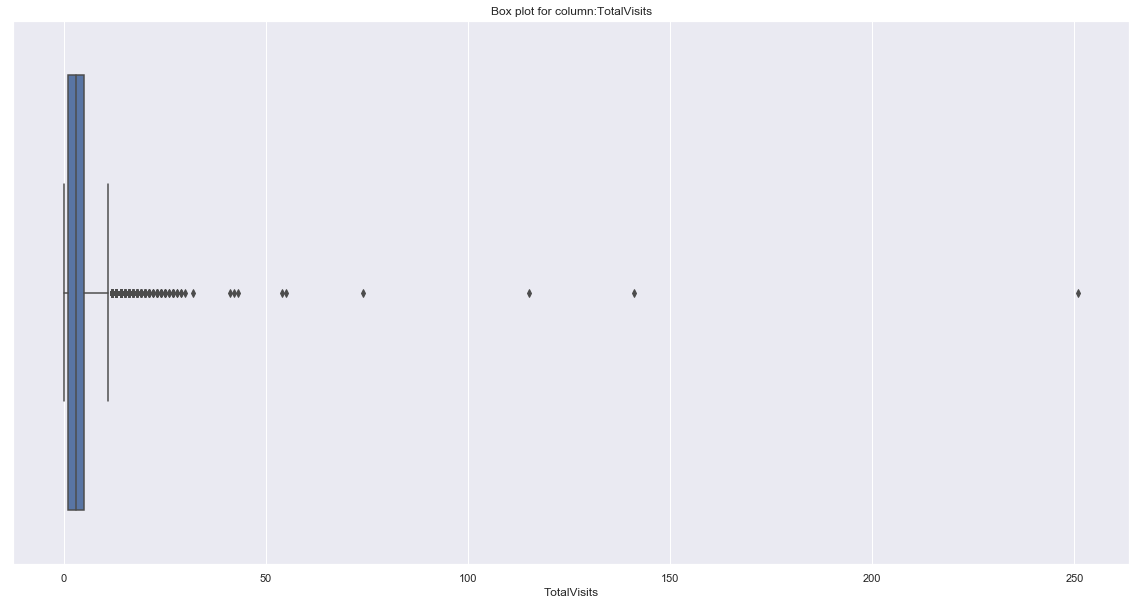

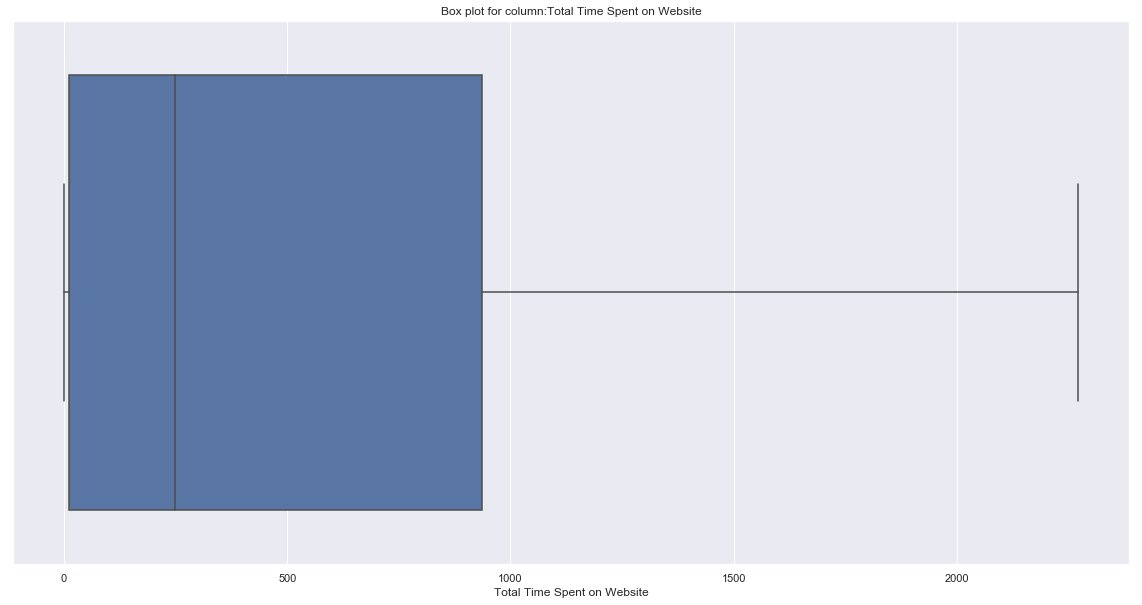

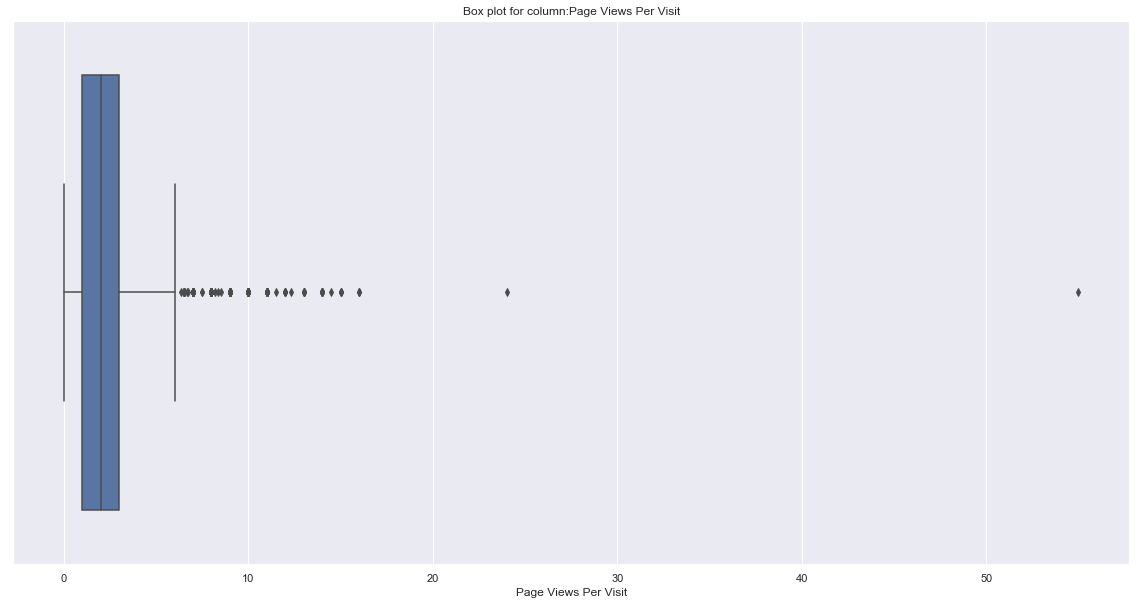

In [65]:
## Get the box Plots for the continuos variables | Start
getContiBoxplots()
## Get the box Plots for the continuos variables | End

In [66]:
## Getting the variations of the continuous variables | Start
for col in cols:
    if((df[col].dtype=='int64' or df[col].dtype=='float64') and (col!='Lead Number' and col!='Converted')):
        print(df[col].describe(percentiles=[0.10,0.25,0.5,0.75,0.9,0.95,0.97,0.99,1]))
## Getting the variations of the continuous variables | Start

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
97%        11.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64
count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
10%         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
97%      1660.000000
99%      1840.610000
100%     2272.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64
count    9240.000000
mean        2.372267
std         2.146715
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
97%         7.000000
99%         9.000000
100%       55.000000
max        55.000000
Name: Page Views Per Visit, dtype:

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
Lead Number                    9240 non-null int64
Lead Origin                    9240 non-null object
Lead Source                    9240 non-null object
Do Not Email                   9240 non-null object
Converted                      9240 non-null int64
TotalVisits                    9240 non-null float64
Total Time Spent on Website    9240 non-null int64
Page Views Per Visit           9240 non-null float64
Last Activity                  9240 non-null object
Last Notable Activity          9240 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


We can see the presence of the outliers in the ,above 3 columns have a huge set of outliers. Lets remove the outliers from these columns

In [68]:
# Check the number of Outliers | Start
out_ttsw=len(df[df['Total Time Spent on Website']>1840])
# Check the number of Outliers | End

# Check the percentage of the whole website | Start
out_ttsw_per=len(df[df['Total Time Spent on Website']>1840])/len(df)*100
print("The number of records to be deleted as Outlier:"
      +str(out_ttsw)+" it is :" + str(out_ttsw_per) + "% of the total records.")
# Check the percentage of the whole website | End

The number of records to be deleted as Outlier:93 it is :1.0064935064935066% of the total records.


In [69]:
# Get the records without the outliers in the column: Total Time Spent on Website |Start
df=df[df['Total Time Spent on Website']<=1840]
df.shape
# Get the records without the outliers in the column: Total Time Spent on Website |End

(9147, 10)

In [70]:
# Get the records without the outliers in the column: Page Views Per Visit |Start
out_pvpv=len(df[df['Page Views Per Visit'] >9])
out_pvpv_per=len(df[df['Page Views Per Visit']>9])/len(df)*100
print("The number of records to be deleted as Outlier:"
      +str(out_pvpv)+" it is :" + str(out_pvpv_per) + "% of the total records.")

df=df[df['Page Views Per Visit'] <=9]
df.shape
# Get the records without the outliers in the column: Page Views Per Visit |End

The number of records to be deleted as Outlier:75 it is :0.819940964250574% of the total records.


(9072, 10)

In [71]:
# Get the records without the outliers in the column: TotalVisits |Start
out_tv=len(df[df['TotalVisits'] > 17])
out_tv_per=len(df[df['TotalVisits']>17])/len(df)*100
print("The number of records to be deleted as Outlier:"
      +str(out_tv)+" it is :" + str(out_tv_per) + "% of the total records.")

df=df[df['TotalVisits'] <=17]
df.shape
# Get the records without the outliers in the column: TotalVisits |End

The number of records to be deleted as Outlier:73 it is :0.804673721340388% of the total records.


(8999, 10)

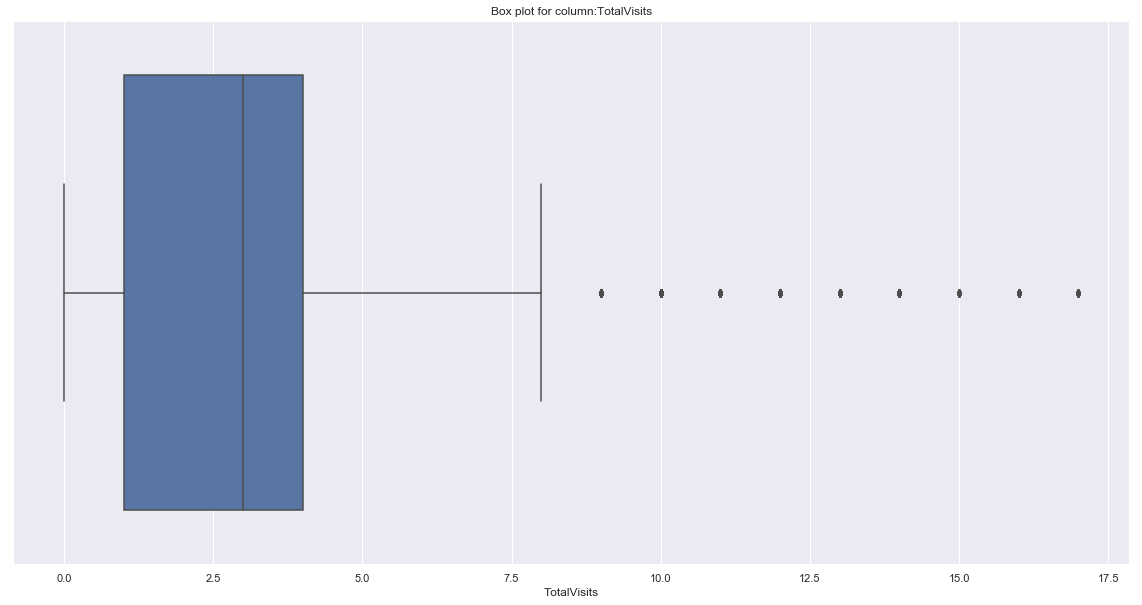

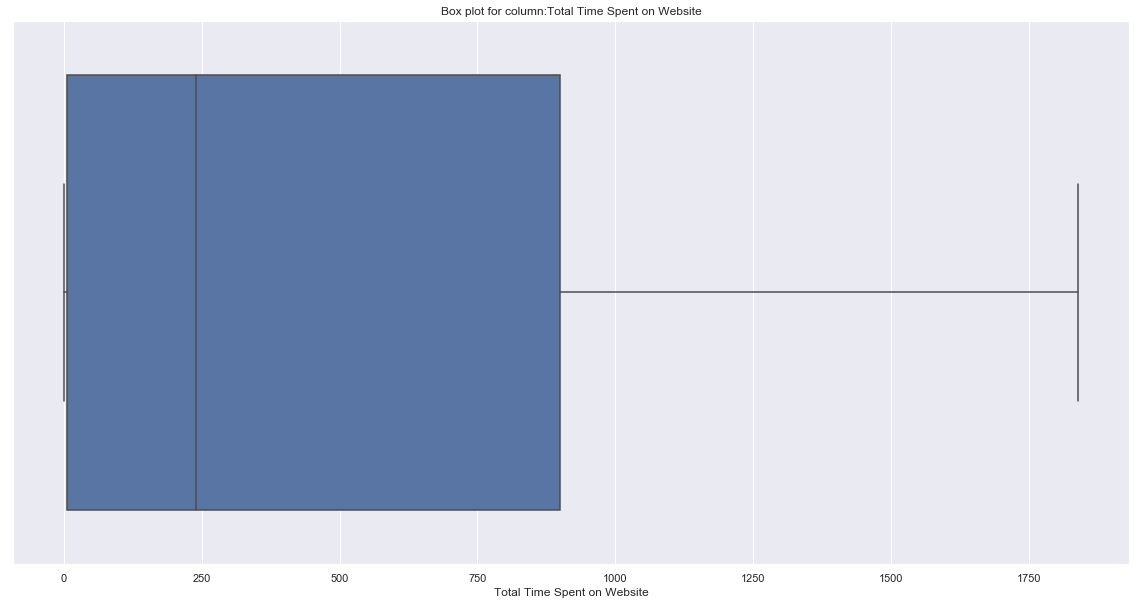

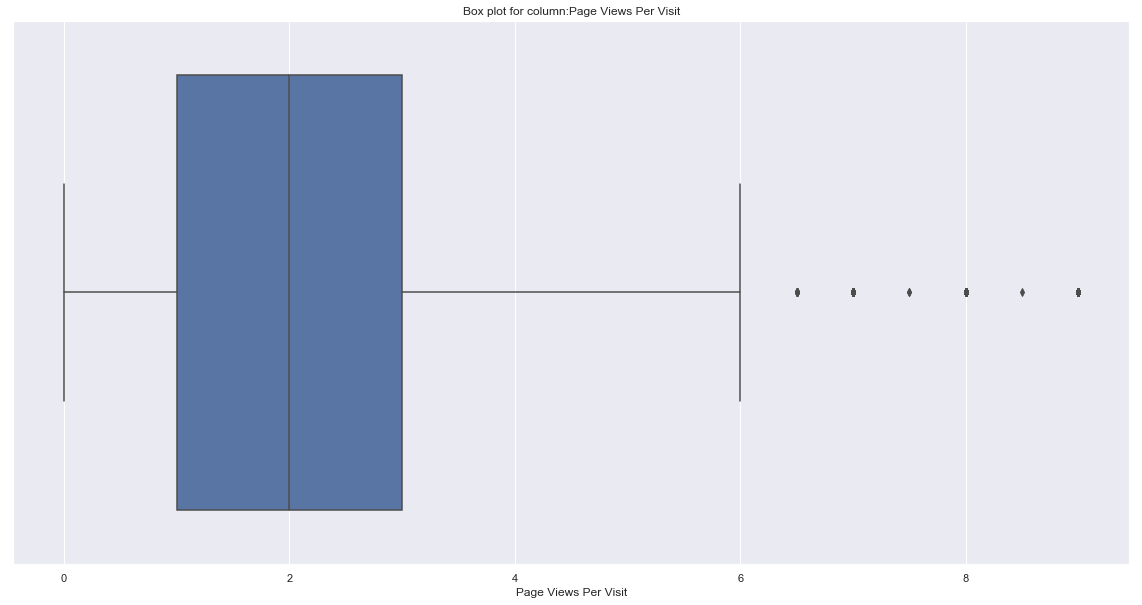

In [72]:
getContiBoxplots()

We have removed the outliers which improved the situation than we had it before. Though we see some of the outliers still exists, these data will be retained for keeping the variations in the data

###### Miscellaneous data cleaning activities

In [73]:
# Miscellaneous data cleaning activities | Start

# we can observe duplication of the values - Like 'Google' & 'google', 
## we can make it one value

## Replace 'google' with 'Google' in Lead Source Coulmn | Start
df['Lead Source']=df['Lead Source'].replace(['google'],'Google')
## Replace 'google' with 'Google' in Lead Source Coulmn | End



# Miscellaneous data cleaning activities | Start

In [74]:
df['Lead Source'].value_counts()

Google               2805
Direct Traffic       2467
Olark Chat           1751
Organic Search       1077
Reference             530
Welingak Website      142
Referral Sites        115
Facebook               55
Unknown                35
bing                    6
Click2call              4
Social Media            2
Live Chat               2
blog                    1
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
Press_Release           1
testone                 1
Name: Lead Source, dtype: int64

## EDA
<b> Lets vizualize the data to get some information out of it </b>

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 0 to 9239
Data columns (total 10 columns):
Lead Number                    8999 non-null int64
Lead Origin                    8999 non-null object
Lead Source                    8999 non-null object
Do Not Email                   8999 non-null object
Converted                      8999 non-null int64
TotalVisits                    8999 non-null float64
Total Time Spent on Website    8999 non-null int64
Page Views Per Visit           8999 non-null float64
Last Activity                  8999 non-null object
Last Notable Activity          8999 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 773.4+ KB


In [76]:
df_dv = df.copy()

In [77]:
## Define the bar plot function | Start
def plotbar(col,title,lx,ly):
    plt.figure(figsize=(20,10))
    sns.set_context('talk')
    ax = (col).plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel(ly, fontsize=16)
    ax.set_xlabel(lx, fontsize=16)
    plt.title(title)
    x_offset = -0.10
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:+.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.show()
## Define the bar plot function | End

In [78]:
## Function to do binning of continuos variables | Start
def binnumeric(col):
    newCol = col+'_bin'
    Q1 = df_dv[col].quantile(0.25)
    Q3 = df_dv[col].quantile(0.75)
    df_dv[newCol] = df_dv[col].apply(lambda x: dobinning(x,Q1,Q3))
def dobinning(x,Q1,Q3):
    if(x<Q1):
        return 'low'
    elif(x>Q3):
        return 'high'
    else:
        return 'normal'
## Function to do binning of continuos variables | End

In [79]:
# Binning the numeric columns in High, Normal and Low | Start
binnumeric('TotalVisits')
binnumeric('Total Time Spent on Website')
binnumeric('Page Views Per Visit')
# Binning the numeric columns in High, Normal and Low | End

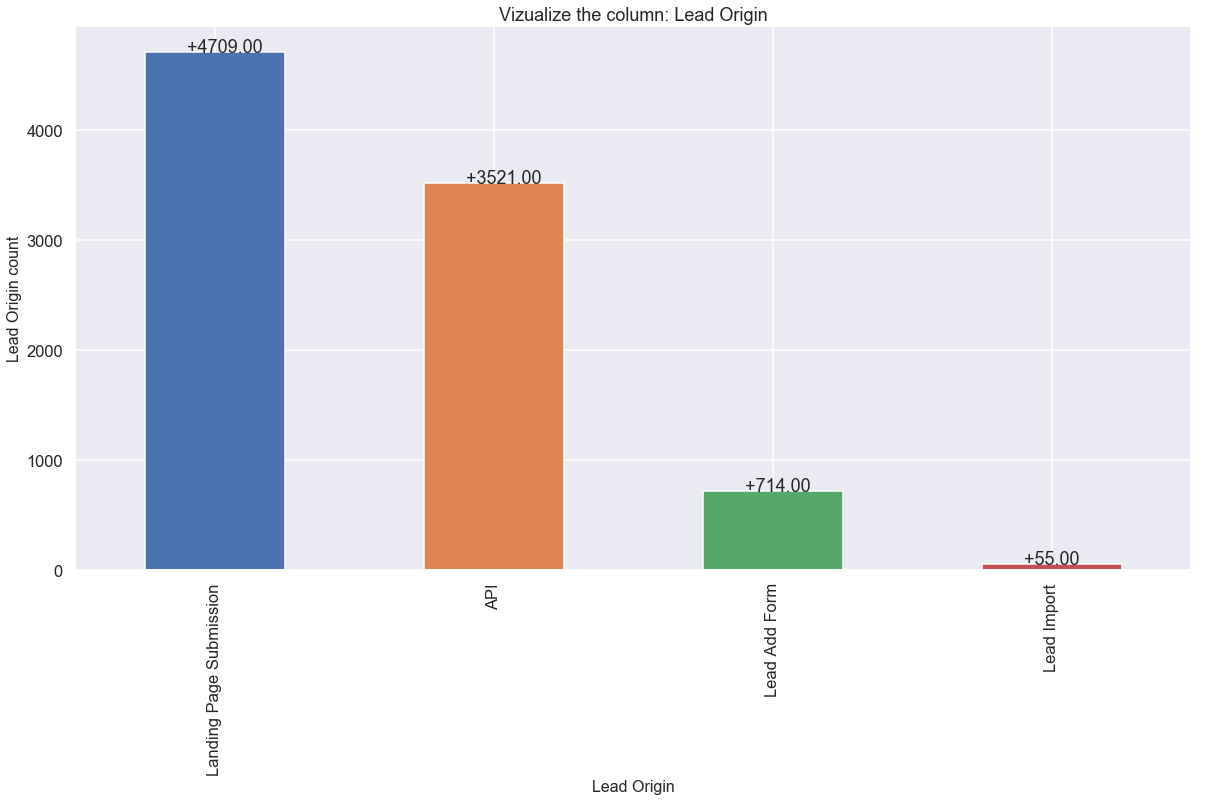

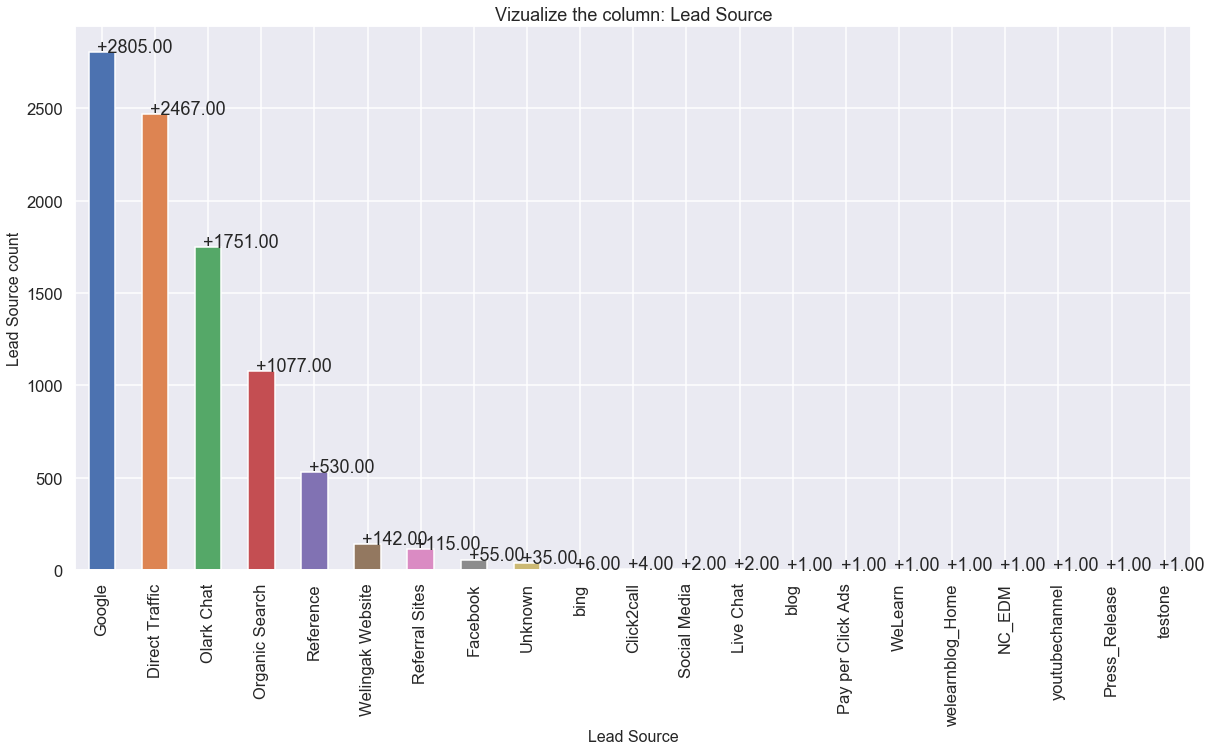

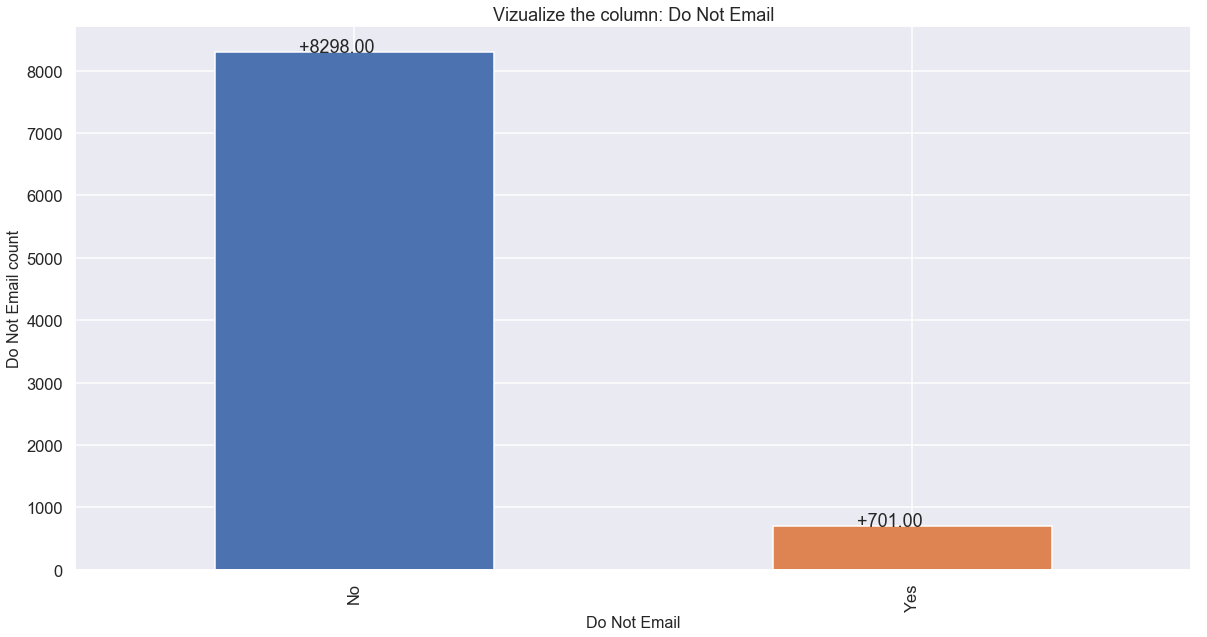

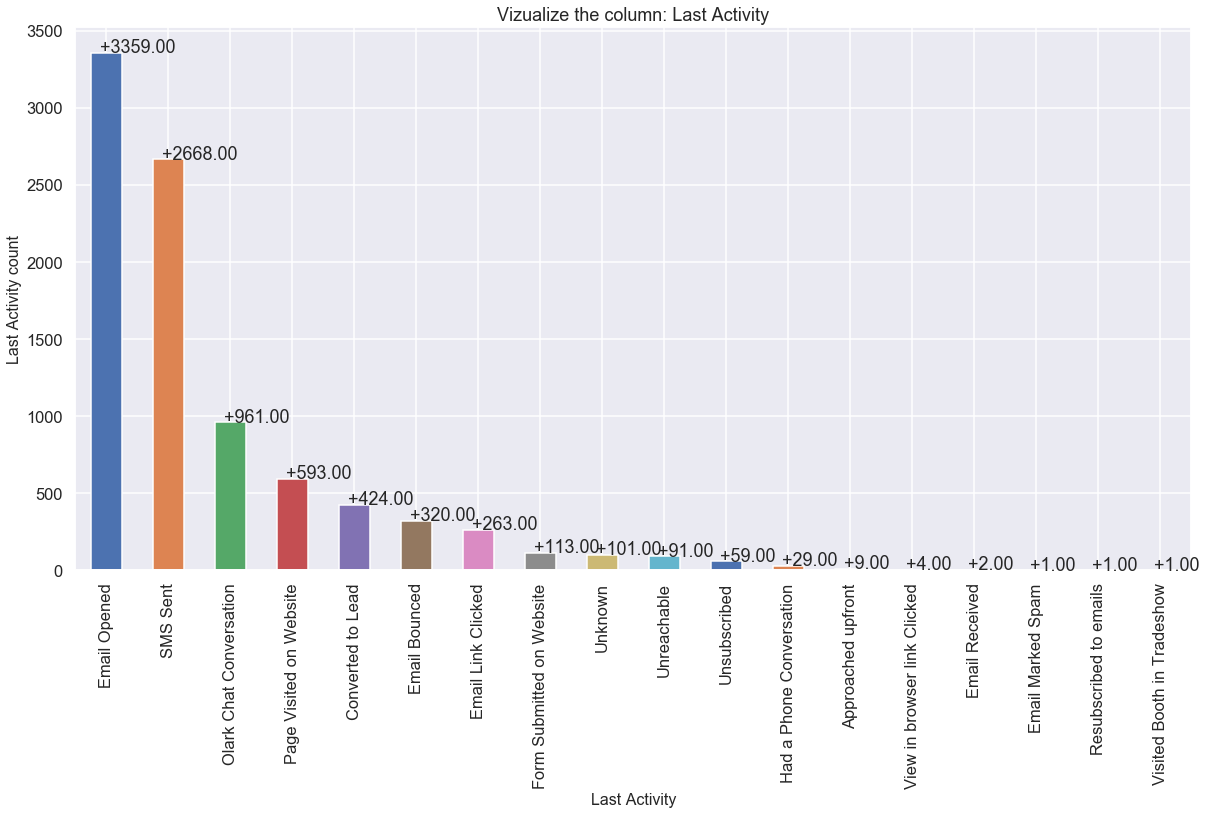

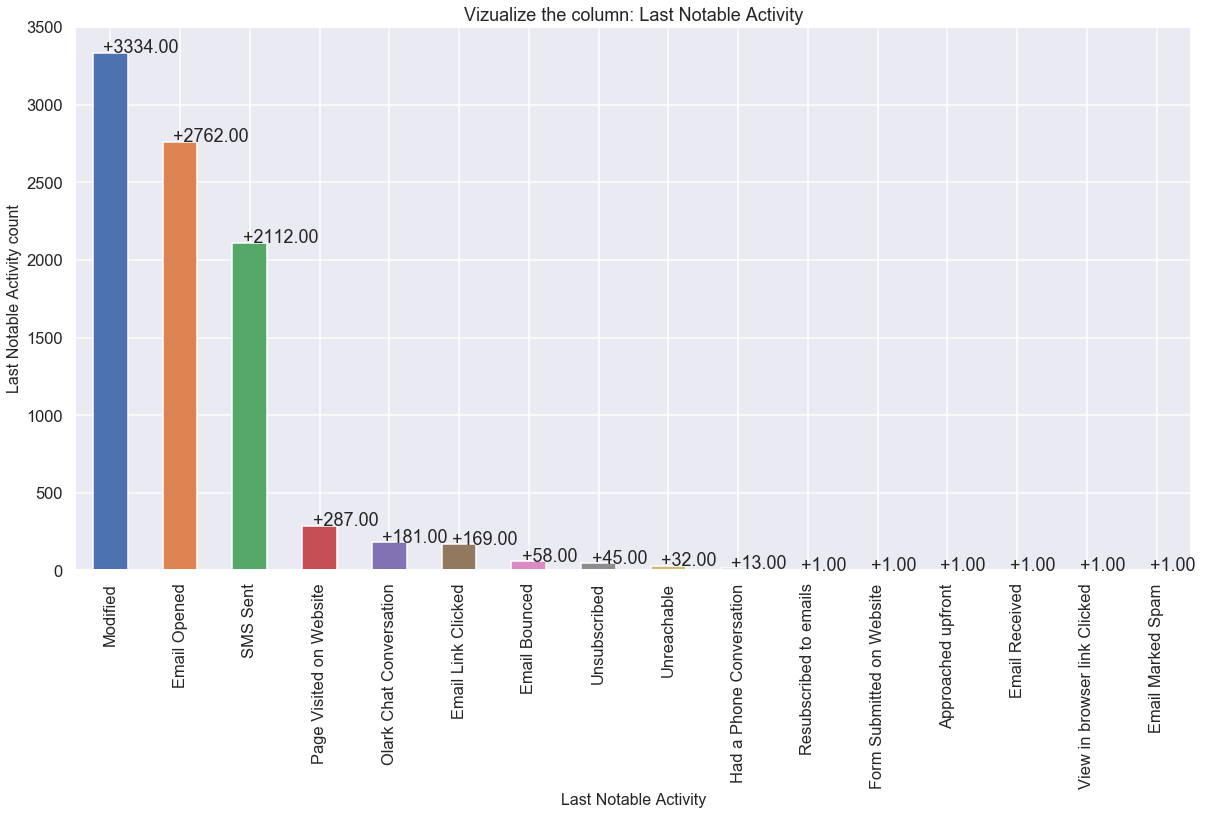

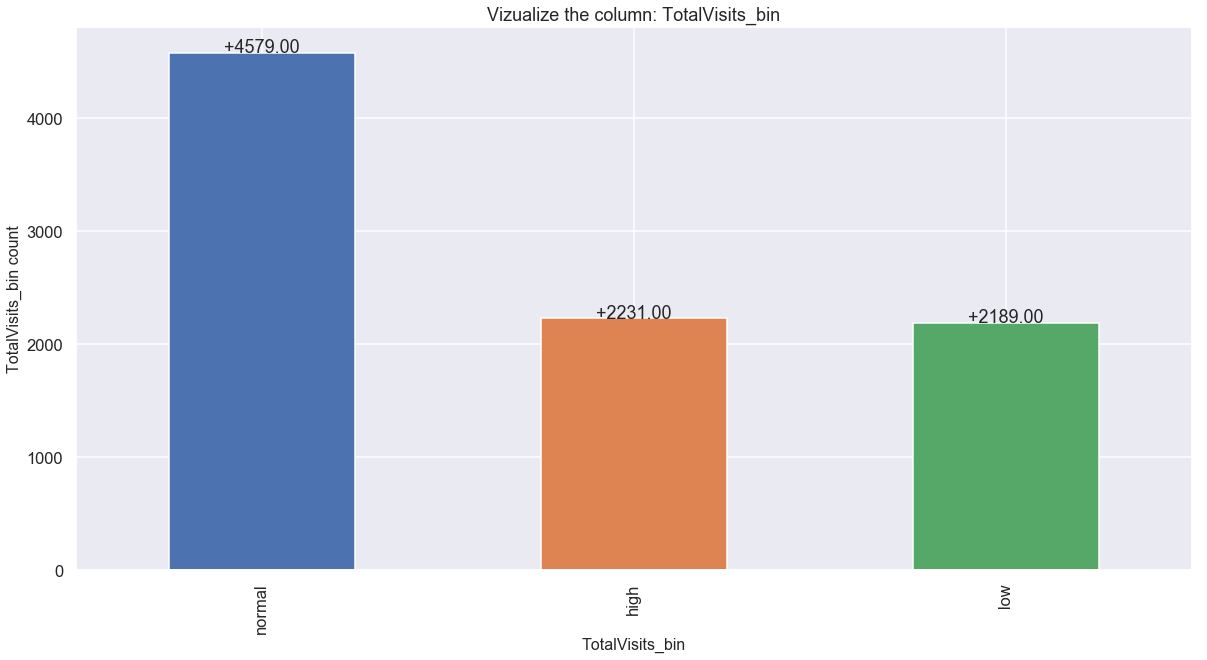

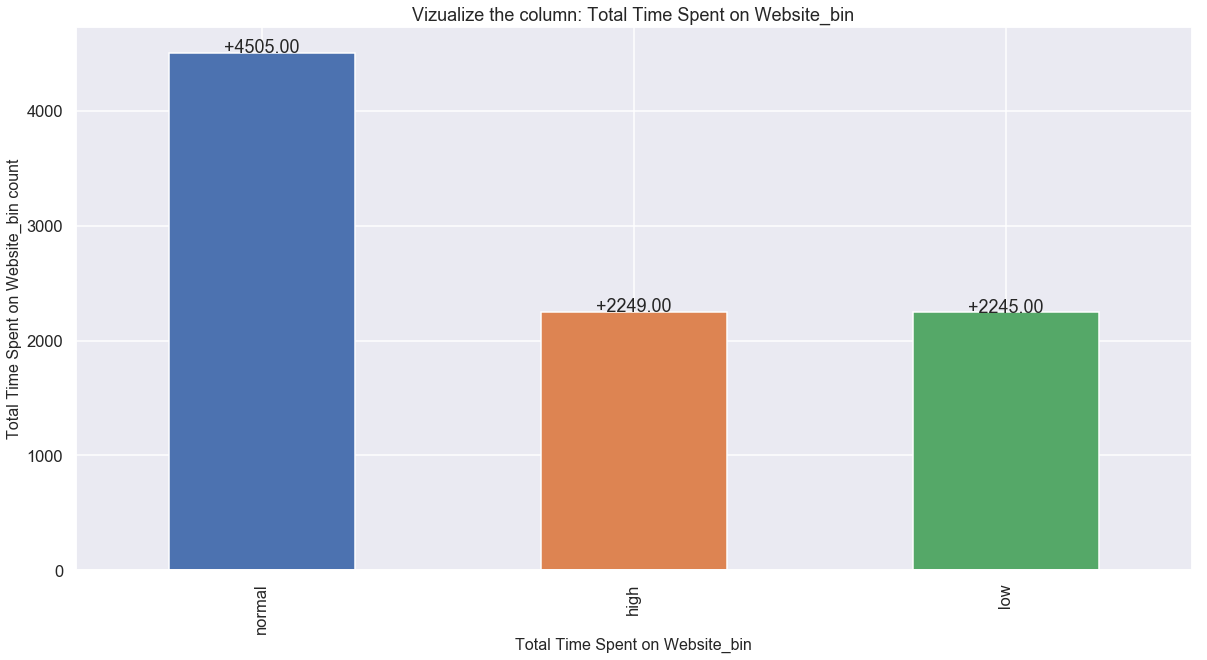

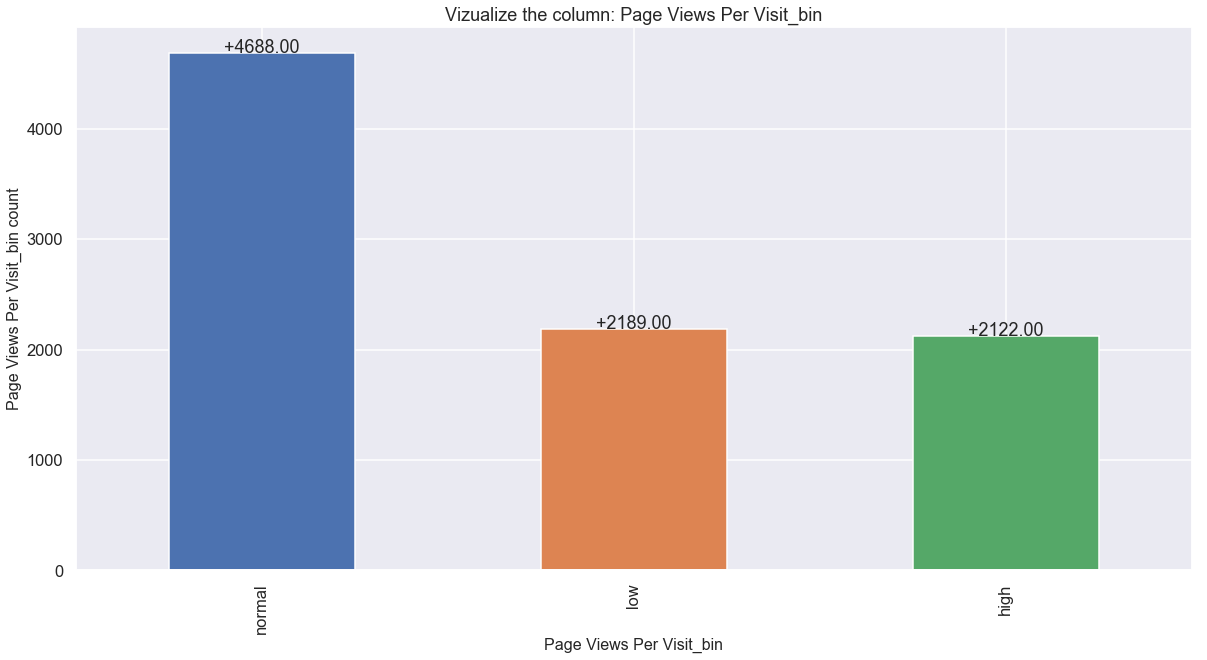

In [80]:
## Vizualize the categorical variables in the dataset | Start
cols=list(df_dv.columns)
for col in cols:
    if((df_dv[col].dtype=='object')):
        pltTitle = 'Vizualize the column: ' + col
        xLabel = col
        yLabel = col + ' count'
        plotbar(df_dv[col].value_counts(),pltTitle,xLabel,yLabel)

## Vizualize the categorical variables in the dataset | End


##           ****** All the categorical variables are plotted below ******* 

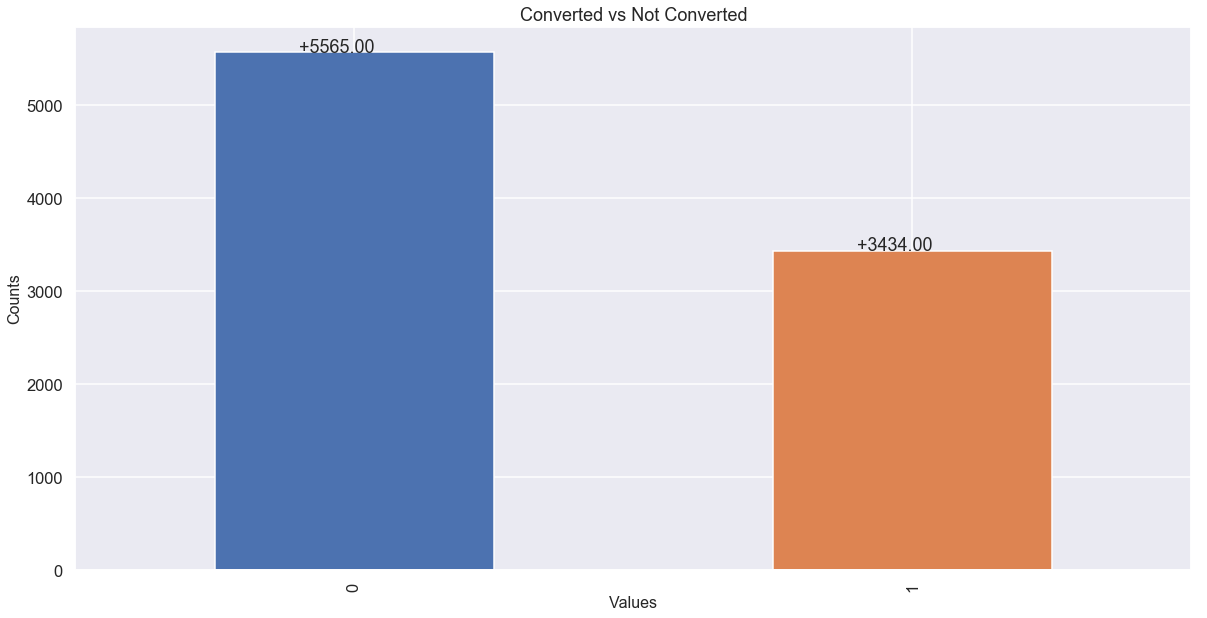

In [81]:
plotbar(df_dv['Converted'].value_counts(),'Converted vs Not Converted','Values','Counts')

<b> <center> Comments </center></b> <br>
<ul>
    <li><b> Lead Origin : </b> Lead Page Submission is the <b> HIGHEST </b> and <b> Lead Import</b> is the <b> lowest </b></li>
    <li><b> Lead Source : </b> Google is the <b> HIGHEST </b> and <b> blog </b> is the <b> lowest </b></li>
    <li><b> Do not email : </b> No is the <b> HIGHEST </b> with 8298 records </li>
    <li><b> Last Activity : </b> Email Opened is the <b> HIGHEST </b> and <b> email marked spam </b> is the <b> lowest </b></li>
    <li><b> What is your current occupation : </b> Unemployed is the <b> HIGHEST </b> and <b> Businessman </b> is the <b> lowest </b></li>
    <li><b> Page views per visit : </b> Though the highest number of page visits are normal, but still we can see a high volume of page visits for 2122 rows, leads</li>
    <li><b> Total Time spent on website : </b> Though the highest number of page visits are normal, but still we can see a high volume of leads which have spent more than normal time</li>
    <li><b> Total visits : </b> Though the highest number of total visits are normal, but still we can see a high volume of leads who have visited more times than the normal/usual  times</li>
    <li><b> Converted : </b> The ratio of 'No's are preety higher than 'Yes'es</li>
    

In [82]:
df_dv.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity,TotalVisits_bin,Total Time Spent on Website_bin,Page Views Per Visit_bin
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Modified,low,low,low
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Email Opened,high,normal,normal
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Email Opened,normal,high,normal
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Modified,normal,normal,normal
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Modified,normal,high,normal


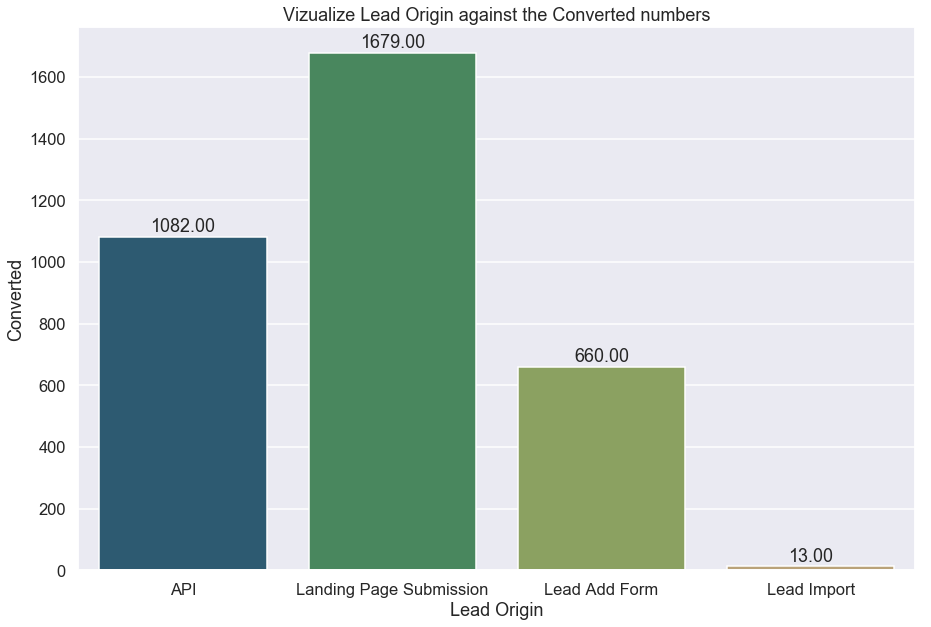

In [83]:
## Group By the Lead Origin column and then get then bar chart of it | Start
df_lo = df_dv.groupby('Lead Origin').Converted.sum().reset_index()

plt.figure(figsize=(15,10))
ax=sns.barplot(x='Lead Origin', y='Converted',data=df_lo,palette=("gist_earth"))
plt.title('Vizualize Lead Origin against the Converted numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

## Group By the Lead Origin column and then get then bar chart of it | End

<center> The Leads are mostly originated from <b> Landing Page Submission and then from API </b> </center>

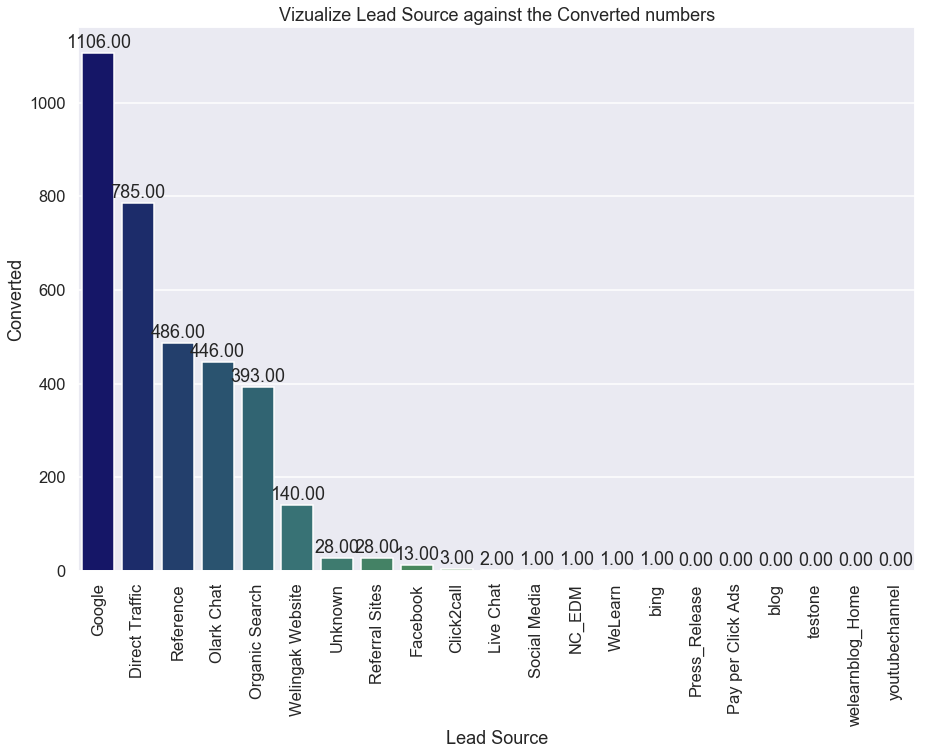

In [84]:
## Group By the Lead Source column and then get then bar chart of it | Start
df_sc = df_dv.groupby('Lead Source').Converted.sum().reset_index().sort_values(by='Converted',ascending=False)
plt.figure(figsize=(15,10))
ax=sns.barplot(x='Lead Source', y='Converted',data=df_sc,palette=("gist_earth"))
plt.title('Vizualize Lead Source against the Converted numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()
## Group By the Lead Source column and then get then bar chart of it | End

<center> The Leads are mostly originated from <b> Google and Direct Traffic </b> </center>

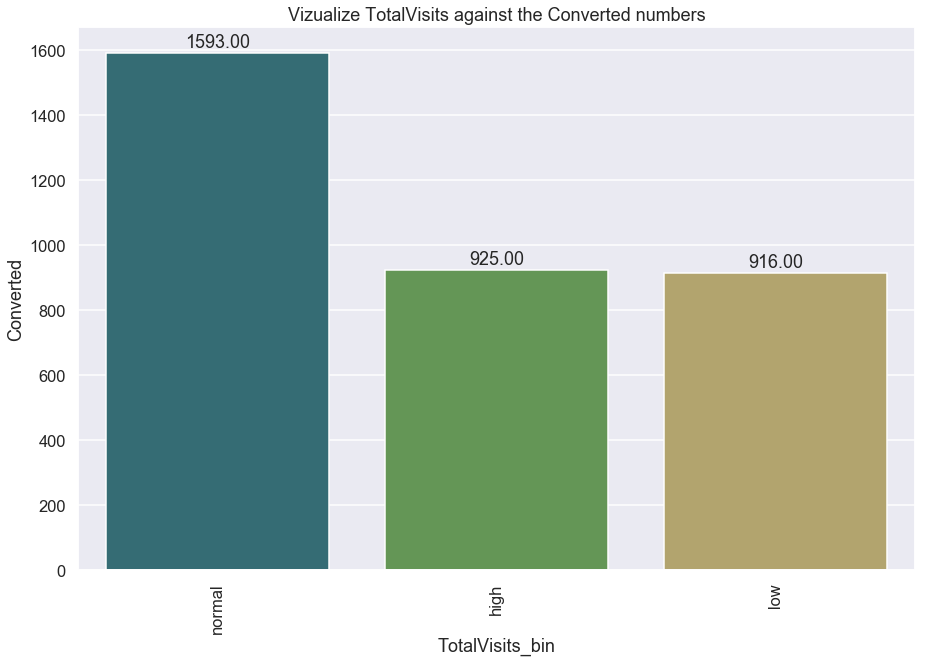

In [85]:
## Group By the TotalVisitse column and then get then bar chart of it | Start
df_sc = df_dv.groupby('TotalVisits_bin').Converted.sum().reset_index().sort_values(by='Converted',ascending=False)
plt.figure(figsize=(15,10))
ax=sns.barplot(x='TotalVisits_bin', y='Converted',data=df_sc,palette=("gist_earth"))
plt.title('Vizualize TotalVisits against the Converted numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()
## Group By the TotalVisits column and then get then bar chart of it | End

<center> The most of the Leads who got converted , page visits are in Normal range </b> </center>

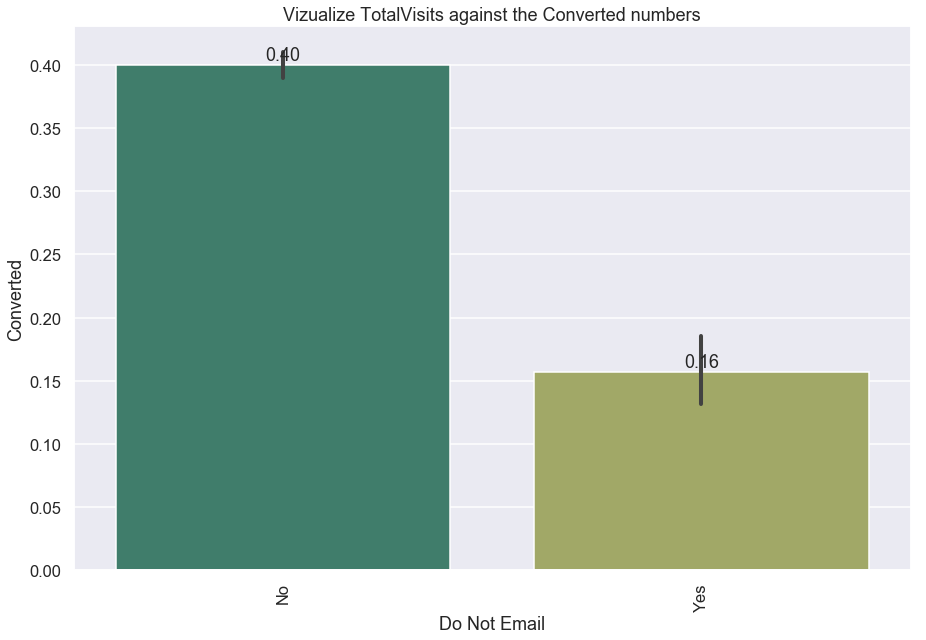

In [86]:
## Group By the TotalVisitse column and then get then bar chart of it | Start
#df_sc = df.groupby('TotalVisits_bin').Converted.sum().reset_index().sort_values(by='Converted',ascending=False)
plt.figure(figsize=(15,10))
ax=sns.barplot(x='Do Not Email', y='Converted',data=df_dv,palette=("gist_earth"))
plt.title('Vizualize TotalVisits against the Converted numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()
## Group By the TotalVisits column and then get then bar chart of it | End

<center> <b>Most of the leads who got converted have selected Do Not Email as NO </b> </center>

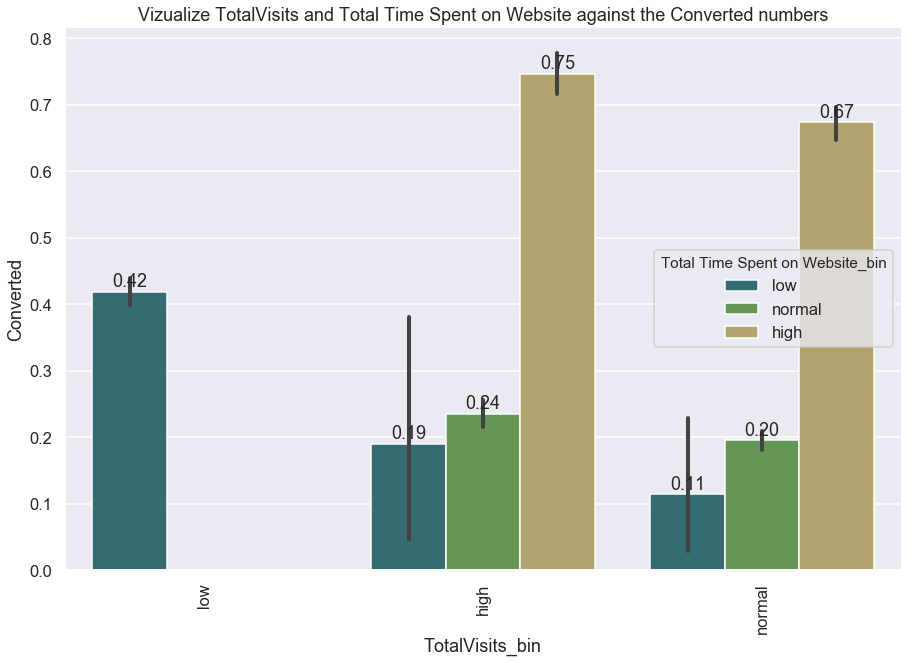

In [87]:
## Vizualize TotalVisits and Total Time Spent on Website against the Converted numbers | Start

plt.figure(figsize=(15,10))
ax=sns.barplot(x='TotalVisits_bin', y='Converted',hue='Total Time Spent on Website_bin',data=df_dv,palette=("gist_earth"))
plt.title('Vizualize TotalVisits and Total Time Spent on Website against the Converted numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()
## Vizualize TotalVisits and Total Time Spent on Website against the Converted numbers | End

<center> We can see that - <b>Those who have high "Total Time spent on website and High Total Visits arer ones who got converted more </b>

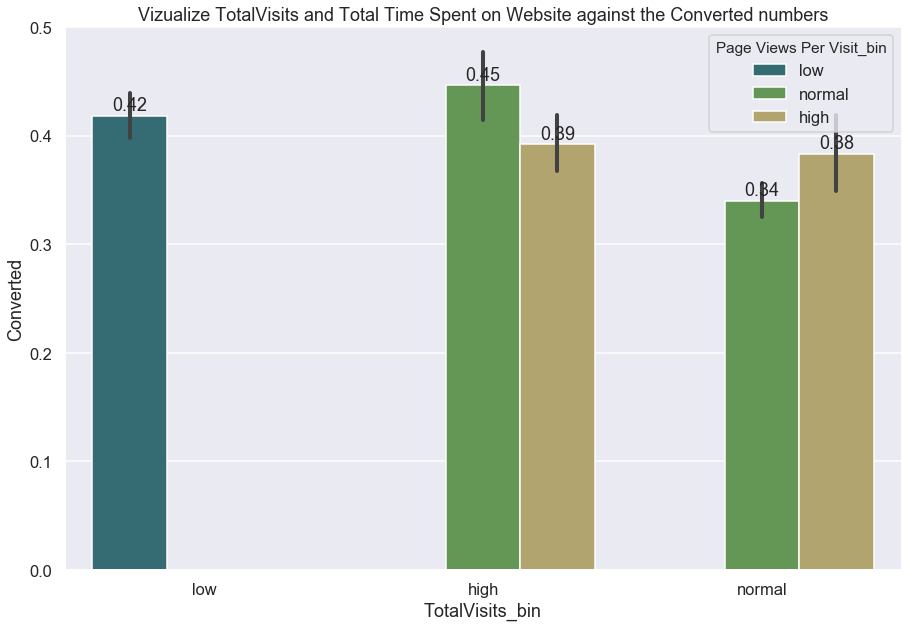

In [88]:
## Vizualize TotalVisits and Total Time Spent on Website against the Converted numbers | Start

plt.figure(figsize=(15,10))
ax=sns.barplot(x='TotalVisits_bin', y='Converted',hue='Page Views Per Visit_bin',data=df_dv,palette=("gist_earth"))
plt.title('Vizualize TotalVisits and Total Time Spent on Website against the Converted numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()
## Vizualize TotalVisits and Total Time Spent on Website against the Converted numbers | End

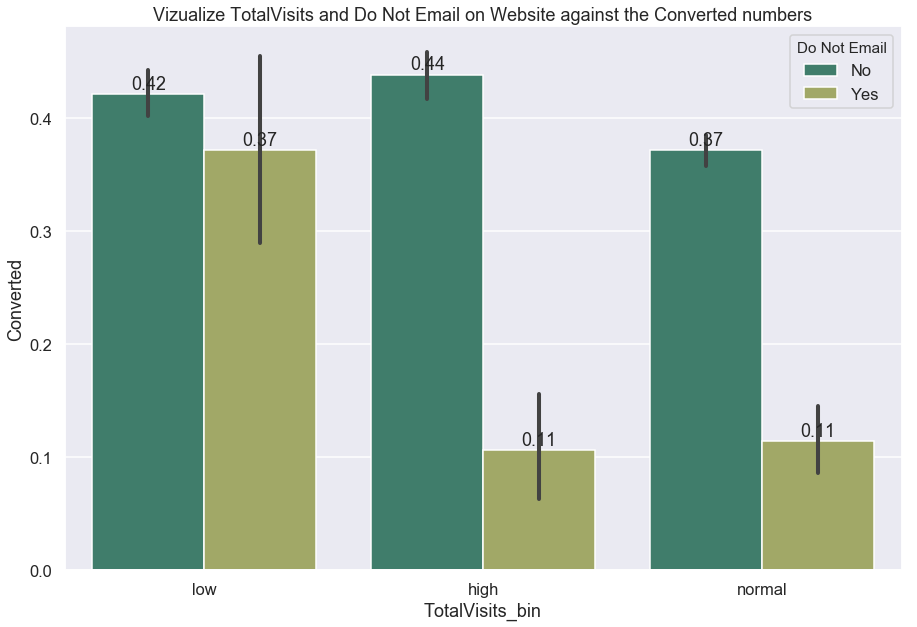

In [89]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x='TotalVisits_bin', y='Converted',hue='Do Not Email',data=df_dv,palette=("gist_earth"))
plt.title('Vizualize TotalVisits and Do Not Email on Website against the Converted numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

In [90]:
df_dv.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity,TotalVisits_bin,Total Time Spent on Website_bin,Page Views Per Visit_bin
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Modified,low,low,low
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Email Opened,high,normal,normal
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Email Opened,normal,high,normal
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Modified,normal,normal,normal
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Modified,normal,high,normal


## Data Preparation
<b> Before we start the modelling lets prepare the data </b>

Lets drop the bins that we created for the data vizualization and work on the original dataset again

In [91]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Modified


<b> Convert Binary variable - Do Not Email to 0 or 1 </b>

In [92]:
df['Do Not Email'] = df['Do Not Email'].apply(lambda x:1 if x=='Yes' else 0)

In [93]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Modified


<b> For categorical variables we create Dummies </b>

In [94]:
# Create dummies for categorical variables | Start
dummies = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Last Notable Activity']],drop_first=True)
# Create dummies for categorical variables | Start

## Add the dummies to the main data set
df=pd.concat([df,dummies],axis=1)

In [95]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Modified,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Modified,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Modified,...,0,0,1,0,0,0,0,0,0,0


As we have created dummies now, we drop the main variables

In [96]:
## Drop the main variables after creating dummies | Start
df=df.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Do Not Email'],axis=1)
## Drop the main variables after creating dummies | End

In [97]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 0 to 9239
Data columns (total 60 columns):
Lead Number                                           8999 non-null int64
Converted                                             8999 non-null int64
TotalVisits                                           8999 non-null float64
Total Time Spent on Website                           8999 non-null int64
Page Views Per Visit                                  8999 non-null float64
Lead Origin_Landing Page Submission                   8999 non-null uint8
Lead Origin_Lead Add Form                             8999 non-null uint8
Lead Origin_Lead Import                               8999 non-null uint8
Lead Source_Direct Traffic                            8999 non-null uint8
Lead Source_Facebook                                  8999 non-null uint8
Lead Source_Google                                    8999 non-null uint8
Lead Source_Live Chat                                 8999 non-null uint8
L

<b> <center> As we have handled the outliers and the Nulls in the Continuous variables already we are good to go for the modelling</center></b>

### Feature Scaling

In [99]:
## Scale the continuos variables | Start

scaler = StandardScaler()
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

## Scale the continuos variables | End

In [100]:
df.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Unknown', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       '

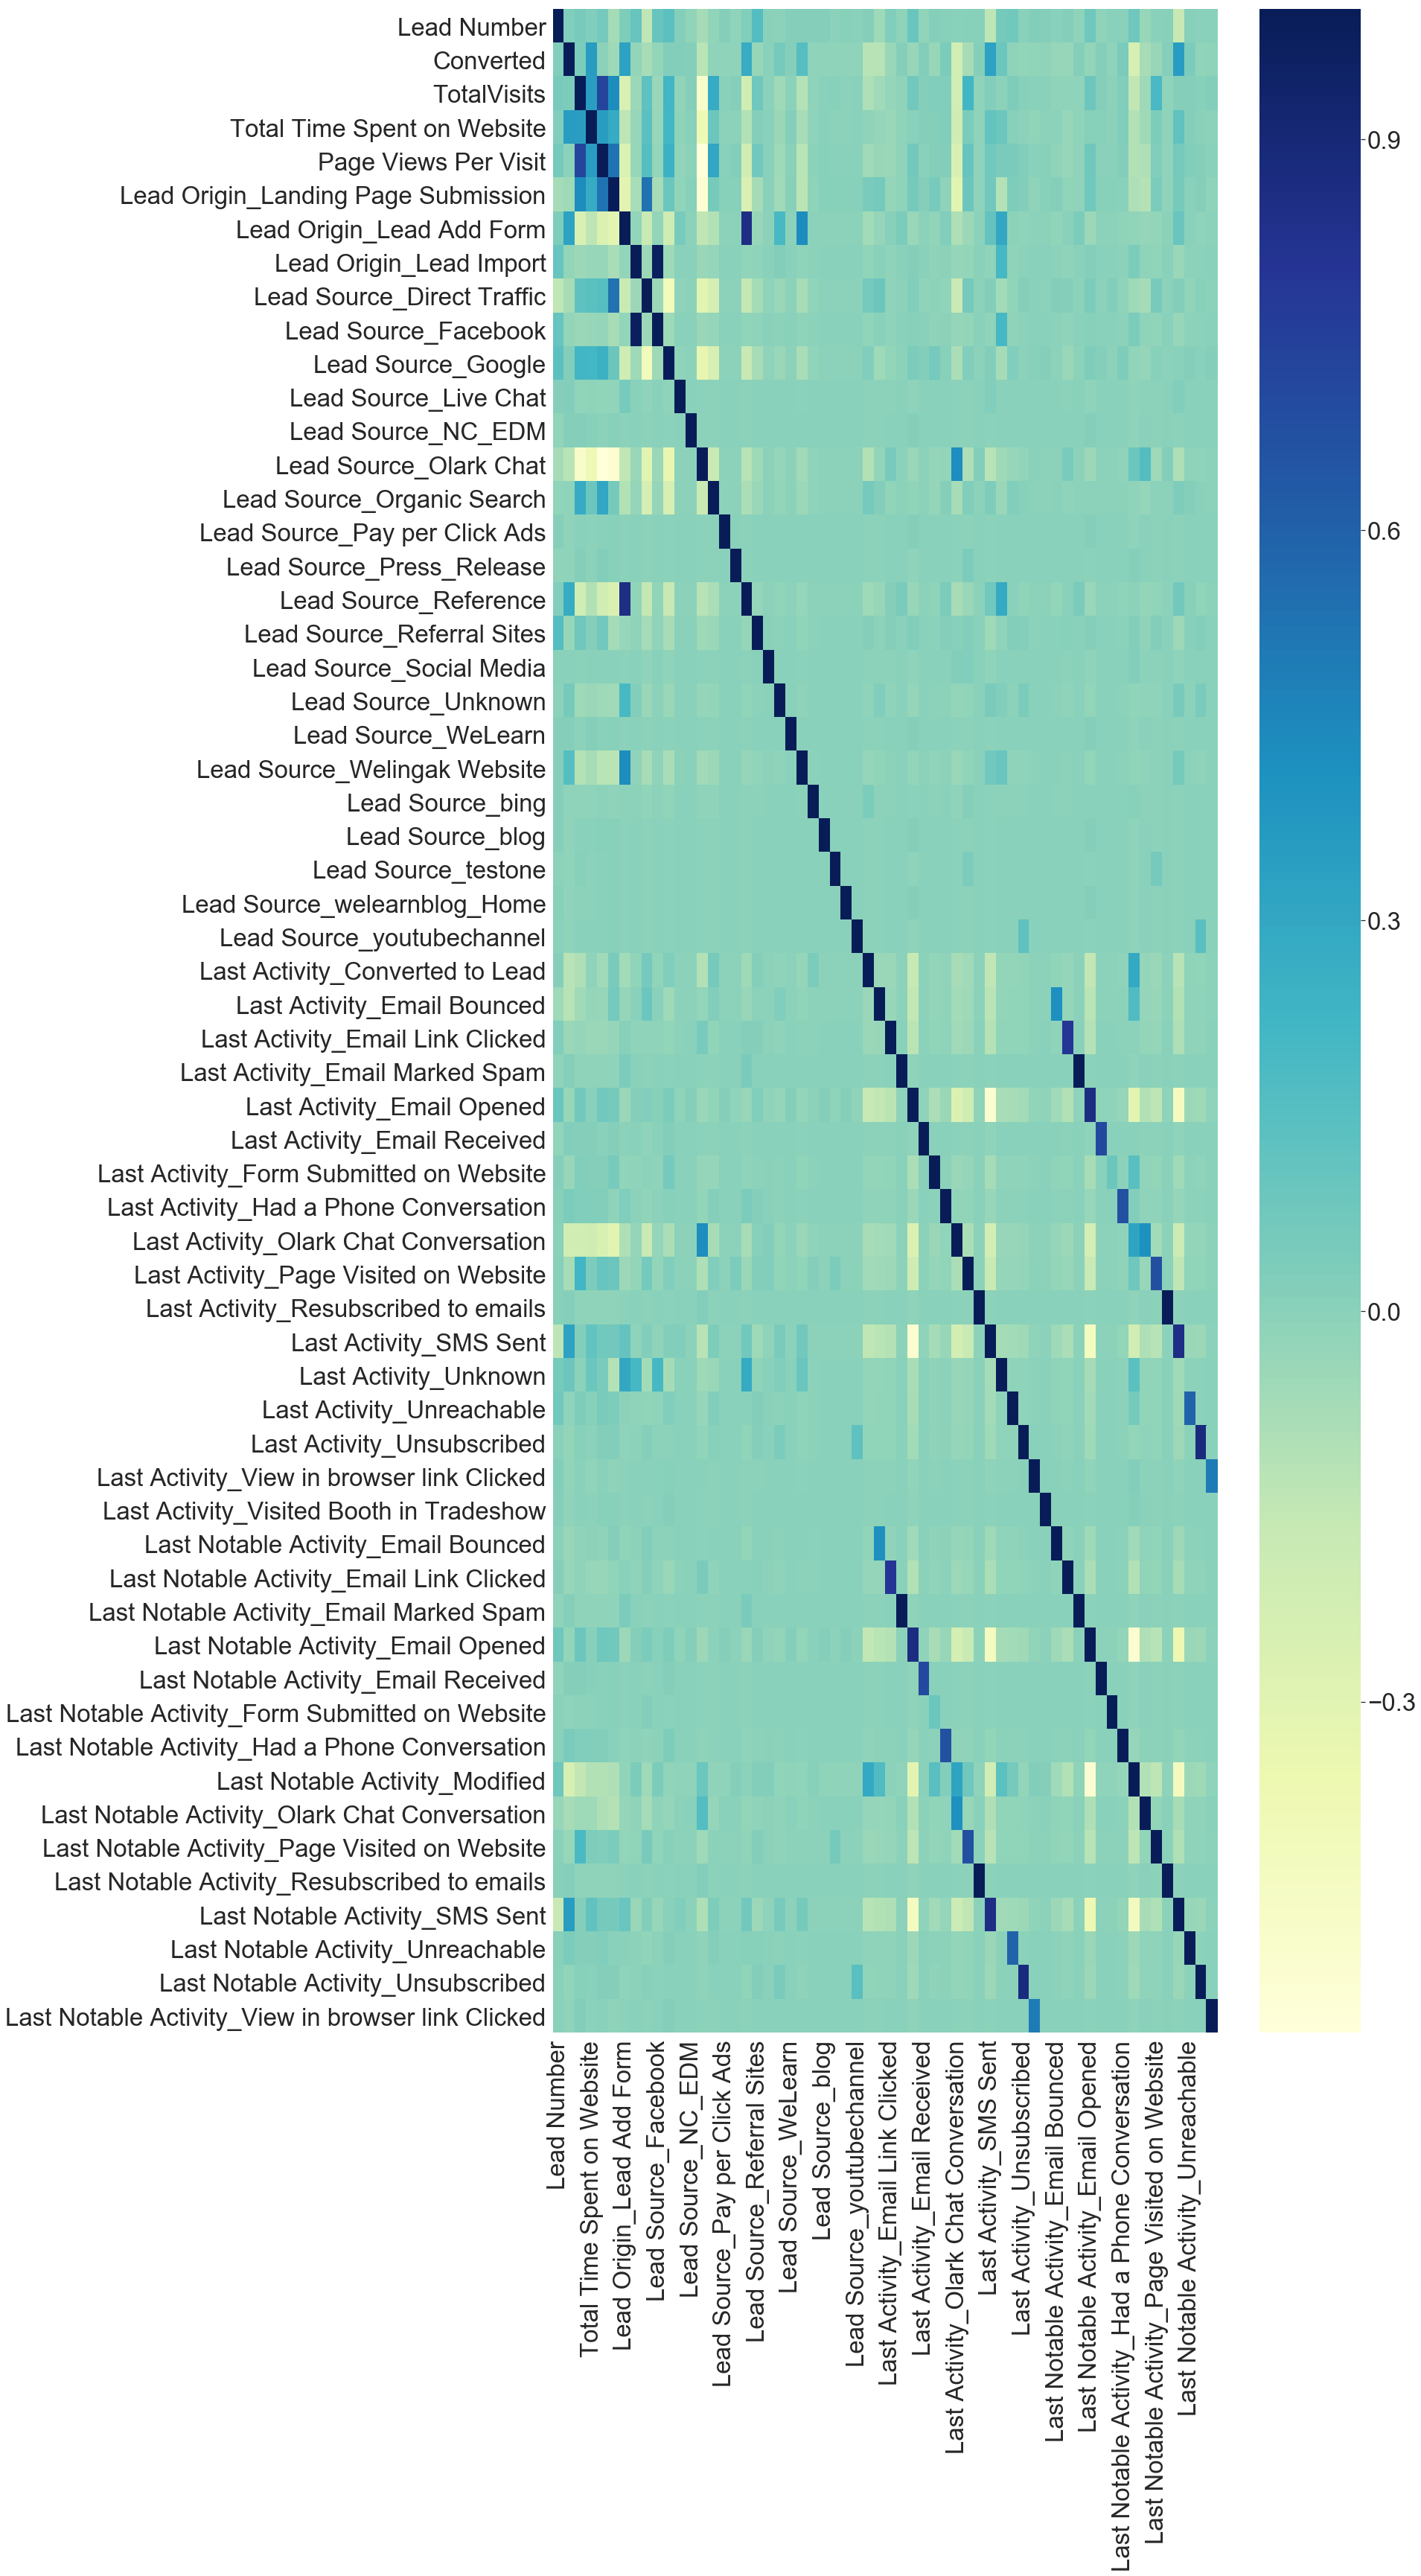

In [101]:
## Correlation between the variables | Start
plt.figure(figsize=(20,50))
sns.set(font_scale=3)
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [102]:
#Finding variables that are highly correlated with each other | Start
correlations = df.corr()
for x in correlations.columns:
    for y in correlations.columns:
        if x < y and correlations[x][y] >= .8:
            print(str(x) + ' and ' + str(y) + ': '+ str(correlations[x][y]))
#Finding variables that are highly correlated with each other | End

Lead Origin_Lead Add Form and Lead Source_Reference: 0.8521558286270586
Lead Origin_Lead Import and Lead Source_Facebook: 0.9817063750203318
Last Activity_Email Marked Spam and Last Notable Activity_Email Marked Spam: 1.0
Last Activity_Email Opened and Last Notable Activity_Email Opened: 0.8623002562627308
Last Activity_Resubscribed to emails and Last Notable Activity_Resubscribed to emails: 1.0
Last Activity_SMS Sent and Last Notable Activity_SMS Sent: 0.8530513204850493
Last Activity_Unsubscribed and Last Notable Activity_Unsubscribed: 0.8726507483211299


<b> <center> So we can drop the any of these columns as they are highly correlated </center></b>

In [103]:
df=df.drop(['Lead Origin_Lead Add Form',
            'Lead Origin_Lead Import',
            'Last Notable Activity_Email Marked Spam',
            'Last Notable Activity_Email Opened',
            'Last Notable Activity_Resubscribed to emails',
            'Last Notable Activity_SMS Sent',
            'Last Notable Activity_Unsubscribed'],axis=1)

### Test Train Split

In [104]:
## Prepare X as feature variable | Start
X=df.drop(['Lead Number','Converted'],axis=1)
## Prepare X as feature variable | End

## Prepare Y as response variable | Start
y=df.Converted
## Prepare Y as response variable | End

## Splitting the data into Train and Test Data set | Start
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
## Splitting the data into Train and Test Data set | End

In [105]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
4714,-1.086838,-0.886780,-1.205023,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5794,-1.086838,-0.886780,-1.205023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,-1.086838,-0.886780,-1.205023,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7768,-0.043960,-0.410620,0.388335,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7896,-0.391586,1.376869,-0.142784,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Lets train our model

In [106]:
import statsmodels.api as sm

# Logistic Regression| Start
logisReg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logisReg.fit().summary()
# Logistic Regression| End

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 09 Jun 2019   Deviance:                          nan
Time:                        22:54:33   Pearson chi2:                 7.47e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               6.204e+15   7.28e+07   8.53e+07      0.000     6.2e+15     6.2e+15
TotalVisits                                         -1.93e+14   1.36e+06  -1.42e+08      0.000   -1.93e+14   -1.93e+14
Total Time Spent on Website                         8.928e+14   9.67e+05   9.23e+08      0.000    8.93e+14    8.93e+14
Page Views Per Visit                                6.273e+13   1.44e+06   4.35e+07      0.000    6.27e+13    6.27e+13
Lead Origin_Landing Page Submission                 9.106e+13   2.59e+06   3.52e+07      0.000    9.11e+13    9.11e+13
Lead Source_Direct Traffic                         -3.899e+15   6.73e+07  -5.79e+07      0.000    -3.9e+15    -3.9e+15
Lead Source_Facebook                               -2.835e+15   6.82e+07  -4.16e+07      0.000   -2.84e+15   -2.84e+15
Lead Source_Google                                 -3.644e+15   6.73e+07  -5.41e+07      0.000   -3.64e+15   -3.64e+15
Lead Source_Live Chat                              -2.084e+15   8.24e+07  -2.53e+07      0.000   -2.08e+15   -2.08e+15
Lead Source_NC_EDM                                   -32.8152   4.71e-07  -6.97e+07      0.000     -32.815     -32.815
Lead Source_Olark Chat                             -4.002e+15   6.73e+07  -5.94e+07      0.000      -4e+15      -4e+15
Lead Source_Organic Search                         -3.713e+15   6.74e+07  -5.51e+07      0.000   -3.71e+15   -3.71e+15
Lead Source_Pay per Click Ads                         25.4100   6.33e-07   4.01e+07      0.000      25.410      25.410
Lead Source_Press_Release                          -7.804e+15   9.52e+07   -8.2e+07      0.000    -7.8e+15    -7.8e+15
Lead Source_Reference                              -1.879e+15   6.74e+07  -2.79e+07      0.000   -1.88e+15   -1.88e+15
Lead Source_Referral Sites                         -3.826e+15   6.78e+07  -5.65e+07      0.000   -3.83e+15   -3.83e+15
Lead Source_Social Media                           -3.878e+15   8.24e+07  -4.71e+07      0.000   -3.88e+15   -3.88e+15
Lead Source_Unknown                                -1.251e+15   6.87e+07  -1.82e+07      0.000   -1.25e+15   -1.25e+15
Lead Source_WeLearn                                   -1.5447   1.27e-07  -1.22e+07      0.000      -1.545      -1.545
Lead Source_Welingak Website                       -1.281e+15   6.77e+07  -1.89e+07      0.000   -1.28e+15   -1.28e+15
Lead Source_bing                                   -3.921e+15   7.27e+07  -5.39e+07      0.000   -3.92e+15   -3.92e+15
Lead Source_blog                                   -4.049e+15   9.51e+07  -4.26e+07      0.000   -4.05e+15   -4.05e+15
Lead Source_testone                                -7.861e+15    9.5e+07  -8.28e+07      0.000   -7.86e+15   -7.86e+15
Lead Source_welearnblog_Home                       -3.595e+15   9.51

### Recursive Feature Elimination (RFE)

In [107]:
# Get the rfe | Start
logreg = LogisticRegression()
rfe=RFE(logreg,13) # We select course value here
rfe=rfe.fit(X_train,y_train)
# Get the rfe | End
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True, False])

In [108]:
## Zip up the corresponding column selection and the rfe score | Start
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
## Zip up the corresponding column selection and the rfe score | End

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 8),
 ('Lead Source_NC_EDM', False, 39),
 ('Lead Source_Olark Chat', False, 21),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_Unknown', True, 1),
 ('Lead Source_WeLearn', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 10),
 ('Lead Source_blog', False, 12),
 ('Lead Source_testone', False, 19),
 ('Lead Source_welearnblog_Home', False, 14),
 ('Lead Source_youtubechannel', False, 17),
 ('Last Activity_Converted to Lead', False,

In [109]:
# Get the columns selected by RFE | Start
rfe_col=X_train.columns[rfe.support_]
# Get the columns selected by RFE | End
rfe_col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Unknown', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

###  <center> Assess the model </center>

<b><center> 1st Execution </center></b>

In [110]:
# Execute the Logical Regresssion - Execution 1 | Start
X_train_sm = sm.add_constant(X_train[rfe_col])
logisReg2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logisReg2.fit()
res.summary()
# Execute the Logical Regresssion - Execution 1 | End

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2839.1
Date:                Sun, 09 Jun 2019   Deviance:                       5678.2
Time:                        22:54:34   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6926      0.057    -12.081      0.000      -0.805      -0.580
Total Time Spent on Website                        1.0222      0.035     29.604      0.000       0.954       1.090
Lead Source_Direct Traffic                        -0.5489      0.078     -7.015      0.000      -0.702      -0.396
Lead Source_Organic Search                        -0.3087      0.102     -3.032      0.002      -0.508      -0.109
Lead Source_Reference                              3.6310      0.201     18.033      0.000       3.236       4.026
Lead Source_Unknown                                3.1276      0.669      4.674      0.000       1.816       4.439
Lead Source_Welingak Website                       5.8761      1.011      5.811      0.000       3.894       7.858
Last Activity_Email Bounced                       -1.1786      0.290     -4.069      0.000      -1.746      -0.611
Last Activity_Had a Phone Conversation             1.0744      0.733      1.467      0.142      -0.361       2.510
Last Activity_SMS Sent                             1.2600      0.071     17.690      0.000       1.120       1.400
Last Notable Activity_Had a Phone Conversation     1.5695      1.318      1.190      0.234      -1.014       4.153
Last Notable Activity_Modified                    -0.9357      0.074    -12.634      0.000      -1.081      -0.790
Last Notable Activity_Olark Chat Conversation     -1.3868      0.320     -4.330      0.000      -2.015      -0.759
Last Notable Activity_Unreachable                  1.4499      0.473      3.066      0.002       0.523       2.377
==================================================================================================================
"""

<center> Here we see the p values are less and that means they are quite significant, thus we will proceed to predict the using the same, later we will check the VIF to refine the columns again </center>

In [111]:
# Get the predicted value of the train set | Start

y_train_pred=res.predict(X_train_sm)

# Get the predicted value of the train set | End
y_train_pred[:10]

4714    0.218461
5794    0.964153
876     0.073462
7768    0.114258
7896    0.316524
1182    0.440827
959     0.490658
1444    0.839097
106     0.091683
4615    0.523100
dtype: float64

In [112]:
# Reshaping the y | Start
y_train_pred=y_train_pred.values.reshape(-1)
# Reshaping the y | Start

<center><b>Create the Dataframe with probabilities and the Lead Id and Converted column<b></center>

In [113]:
# Create the final train y dataset with probabilities | Start
y_train_pred_final = pd.DataFrame({'Lead ID':y_train.index, 'Converted':y_train.values, 'Convert probability':y_train_pred})
# Create the final train y dataset with probabilities | End

In [114]:
y_train_pred_final.head()

,Lead ID,Converted,Convert probability
0,4714,0,0.218461
1,5794,1,0.964153
2,876,1,0.073462
3,7768,0,0.114258
4,7896,0,0.316524


In [115]:
# Create the Predicted Value where probablity is >=0.5 | Start
y_train_pred_final['Predicted'] = y_train_pred_final['Convert probability'].apply(lambda x: 1 if x>=0.5 else 0)
# Create the Predicted Value where probablity is >=0.5 | End

In [116]:
y_train_pred_final.head()

,Lead ID,Converted,Convert probability,Predicted
0,4714,0,0.218461,0
1,5794,1,0.964153,1
2,876,1,0.073462,0
3,7768,0,0.114258,0
4,7896,0,0.316524,0


In [117]:
# Creating the Confusion Matrix | Start
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
# Creating the Confusion Matrix | End

confusion_matrix

array([[3421,  467],
       [ 874, 1537]])

In [118]:
# Predicted         Not Converted    Converted
# Actual
# Not Converted        3421            467
# Converted            874            1537

In [119]:
# Check the accuracy score | Start
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
# Check the accuracy score | End

accuracy

0.7871090649309415

<center> Now lets check the <b>VIF</b> </center>

In [120]:
# Get the VIF of each variable | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)
vif_df
# Get the VIF of each variable | End

,Features,vif
7,Last Activity_Had a Phone Conversation,1.93
9,Last Notable Activity_Had a Phone Conversation,1.92
8,Last Activity_SMS Sent,1.27
1,Lead Source_Direct Traffic,1.26
10,Last Notable Activity_Modified,1.26
2,Lead Source_Organic Search,1.13
6,Last Activity_Email Bounced,1.09
3,Lead Source_Reference,1.08
0,Total Time Spent on Website,1.07
5,Lead Source_Welingak Website,1.03


Though the VIF score of all the columns are less than 2, but there are 2 columns whose p values are high, viz. Last Notable Activity_Had a Phone Conversation and Last Notable Activity_Had a Phone Conversation. So we drop one of them - <b> Last Notable Activity_Had a Phone Conversation </b> and run the model again

<b><center> 2nd Execution </center></b>

Drop the column - Last Notable Activity_Had a Phone Conversation

In [121]:
## Drop the column having high p value and high VIF | Start
rfe_col=rfe_col.drop('Last Notable Activity_Had a Phone Conversation',1)
## Drop the column having high p value and high VIF | End

In [122]:
# Execute the Logical Regresssion - Execution 2 | Start
X_train_sm = sm.add_constant(X_train[rfe_col])
logisReg3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logisReg3.fit()
res.summary()
# Execute the Logical Regresssion - Execution 2 | End

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2839.9
Date:                Sun, 09 Jun 2019   Deviance:                       5679.8
Time:                        22:54:34   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6891      0.057    -12.038      0.000      -0.801      -0.577
Total Time Spent on Website                       1.0220      0.035     29.600      0.000       0.954       1.090
Lead Source_Direct Traffic                       -0.5510      0.078     -7.042      0.000      -0.704      -0.398
Lead Source_Organic Search                       -0.3146      0.102     -3.093      0.002      -0.514      -0.115
Lead Source_Reference                             3.6281      0.201     18.016      0.000       3.233       4.023
Lead Source_Unknown                               3.1260      0.669      4.670      0.000       1.814       4.438
Lead Source_Welingak Website                      5.8754      1.011      5.811      0.000       3.894       7.857
Last Activity_Email Bounced                      -1.1760      0.290     -4.060      0.000      -1.744      -0.608
Last Activity_Had a Phone Conversation            1.6673      0.555      3.002      0.003       0.579       2.756
Last Activity_SMS Sent                            1.2595      0.071     17.682      0.000       1.120       1.399
Last Notable Activity_Modified                   -0.9417      0.074    -12.738      0.000      -1.087      -0.797
Last Notable Activity_Olark Chat Conversation    -1.3898      0.320     -4.340      0.000      -2.017      -0.762
Last Notable Activity_Unreachable                 1.4479      0.473      3.061      0.002       0.521       2.375
=================================================================================================================
"""

<center> After removing one of the column - Last Notable Activity_Had a Phone Conversation, we see the p values are less and that means they are quite significant, thus we will proceed to predict the using the same again, later we will check the VIF to refine the columns again </center>

In [123]:
# Get the predicted value of the train set | Start

y_train_pred=res.predict(X_train_sm)

# Get the predicted value of the train set | End
y_train_pred[:10]

4714    0.217965
5794    0.964161
876     0.073298
7768    0.114005
7896    0.315478
1182    0.441143
959     0.489948
1444    0.839513
106     0.091479
4615    0.523405
dtype: float64

In [124]:
# Reshaping the y | Start
y_train_pred=y_train_pred.values.reshape(-1)
# Reshaping the y | Start

In [125]:
y_train_pred_final['Convert probability'] =y_train_pred


# Check the accuracy score | Start
accuracy2 = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
# Check the accuracy score | End

accuracy2

0.7871090649309415

Earlier (1st Run) the accuracy score was- <b> 0.7871090649309415 </b> and now we got the score as - <b> 0.7871090649309415 </b>

#### Get the VIF again

In [126]:
# Get the VIF of each variable | Start
vif_df2=pd.DataFrame()
vif_df2['Features'] = X_train[rfe_col].columns
vif_df2['vif'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]

vif_df2['vif'] = round(vif_df2['vif'], 2)
vif_df2 = vif_df2.sort_values(by = "vif", ascending = False)
vif_df2
# Get the VIF of each variable | End

,Features,vif
8,Last Activity_SMS Sent,1.27
1,Lead Source_Direct Traffic,1.26
9,Last Notable Activity_Modified,1.26
2,Lead Source_Organic Search,1.13
6,Last Activity_Email Bounced,1.09
3,Lead Source_Reference,1.08
0,Total Time Spent on Website,1.07
5,Lead Source_Welingak Website,1.03
4,Lead Source_Unknown,1.01
7,Last Activity_Had a Phone Conversation,1.01


Though we have the VIF and the P values in control but we have a column - <b> Lead Source_Unknown </b>, which doesnt have values from users (which we have imputed), lets see if we can remove this column.

<b><center> 3rd Execution </center></b>

In [127]:
## Drop the column having Unknown| Start
rfe_col=rfe_col.drop('Lead Source_Unknown',1)
## Drop the column having Unknown | End

In [128]:
rfe_col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [129]:
# Execute the Logical Regresssion - Execution 3 | Start
X_train_sm = sm.add_constant(X_train[rfe_col])
logisReg4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logisReg4.fit()
res.summary()
# Execute the Logical Regresssion - Execution 3 | End

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.4
Date:                Sun, 09 Jun 2019   Deviance:                       5716.8
Time:                        22:54:34   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6679      0.057    -11.738      0.000      -0.779      -0.556
Total Time Spent on Website                       1.0108      0.034     29.381      0.000       0.943       1.078
Lead Source_Direct Traffic                       -0.5765      0.078     -7.387      0.000      -0.729      -0.424
Lead Source_Organic Search                       -0.3409      0.102     -3.358      0.001      -0.540      -0.142
Lead Source_Reference                             3.5941      0.201     17.857      0.000       3.200       3.989
Lead Source_Welingak Website                      5.8393      1.011      5.775      0.000       3.858       7.821
Last Activity_Email Bounced                      -1.0946      0.283     -3.866      0.000      -1.650      -0.540
Last Activity_Had a Phone Conversation            1.6646      0.555      2.999      0.003       0.577       2.752
Last Activity_SMS Sent                            1.2830      0.071     18.085      0.000       1.144       1.422
Last Notable Activity_Modified                   -0.9472      0.074    -12.860      0.000      -1.092      -0.803
Last Notable Activity_Olark Chat Conversation    -1.4055      0.319     -4.401      0.000      -2.032      -0.780
Last Notable Activity_Unreachable                 1.4338      0.472      3.035      0.002       0.508       2.360
=================================================================================================================
"""

<center> After removing one of the column - Lead Source_Unknown we see the p values are less and that means they are quite significant, thus we will proceed to predict the using the same again, later we will check the VIF to refine the columns again </center>

In [130]:
# Get the predicted value of the train set | Start

y_train_pred=res.predict(X_train_sm)

# Get the predicted value of the train set | End
y_train_pred[:10]

4714    0.226467
5794    0.964870
876     0.075067
7768    0.116083
7896    0.310070
1182    0.437383
959     0.489528
1444    0.838907
106     0.093417
4615    0.518690
dtype: float64

In [131]:
# Reshaping the y | Start
y_train_pred=y_train_pred.values.reshape(-1)
# Reshaping the y | Start

In [132]:
y_train_pred_final['Convert probability'] =y_train_pred


# Check the accuracy score | Start
accuracy3 = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
# Check the accuracy score | End

accuracy3

0.7871090649309415

Earlier (2nd Run) the accuracy score was- <b> 0.7871090649309415 </b> and now we got the score as - <b> 0.7871090649309415 </b>

<b> Get the VIF again </b>

In [133]:
# Get the VIF of each variable | Start
vif_df3=pd.DataFrame()
vif_df3['Features'] = X_train[rfe_col].columns
vif_df3['vif'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]

vif_df3['vif'] = round(vif_df2['vif'], 2)
vif_df3 = vif_df3.sort_values(by = "vif", ascending = False)
vif_df3
# Get the VIF of each variable | End

,Features,vif
8,Last Notable Activity_Modified,1.27
1,Lead Source_Direct Traffic,1.26
9,Last Notable Activity_Olark Chat Conversation,1.26
2,Lead Source_Organic Search,1.13
6,Last Activity_Had a Phone Conversation,1.09
3,Lead Source_Reference,1.08
0,Total Time Spent on Website,1.07
5,Last Activity_Email Bounced,1.03
4,Lead Source_Welingak Website,1.01
7,Last Activity_SMS Sent,1.01


#### Lets check the confusion matrix again

In [134]:
## Get the confusion matrix | Start
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
confusion2
## Get the confusion matrix | End

array([[3421,  467],
       [ 874, 1537]])

In [135]:
# Predicted         Not Converted    Converted
# Actual
# Not Converted        3421            467
# Converted            874            1537

### Lets calculate other necessary metrics

<b> We calculate Sensitivity, Specificity, True Positive and False Positives </b>

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6374948154292824

In [138]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.12011316872427984


In [139]:
# positive predictive value 
print (TP / float(TP+FP))

0.7669660678642715


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7965075669383004


### Plot the ROC Curve

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

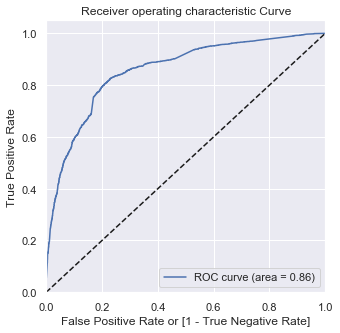

In [142]:
### Plot the ROC Curve for the predicted and the actual values
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Convert probability'], drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Convert probability'])

<center> Thus we can see <b> AUC = 0.86 </b> for the above curve, which can be interpreted as a good score as it is near to 1.</center>

In [143]:
### Lets create the various cutoff thresholds for the probability | Start

numbers=[float(x)/10 for x in range(10)]
for num in numbers:
    y_train_pred_final[num]=y_train_pred_final['Convert probability'].apply(lambda x: 1 if x>num else 0)

y_train_pred_final.head()
### Lets create the various cutoff thresholds for the probability | End

,Lead ID,Converted,Convert probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4714,0,0.226467,0,1,1,1,0,0,0,0,0,0,0
1,5794,1,0.964870,1,1,1,1,1,1,1,1,1,1,1
2,876,1,0.075067,0,1,0,0,0,0,0,0,0,0,0
3,7768,0,0.116083,0,1,1,0,0,0,0,0,0,0,0
4,7896,0,0.310070,0,1,1,1,1,0,0,0,0,0,0


In [144]:
## Calculate the Specificity and Sensitivity for the above probability cutoffs | Start
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
for num in numbers:
    conf_mat = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[num])
    total = sum(sum(conf_mat))
    accuracy = (conf_mat[0,0]+conf_mat[1,1])/total
    
    sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    specificity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    
    cutoff_df.loc[num] = [num,accuracy,sensitivity,specificity]
## Calculate the Specificity and Sensitivity for the above probability cutoffs | End
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.382759,0.000000,1.000000
0.1,0.1,0.565487,0.318416,0.963915
0.2,0.2,0.710589,0.598765,0.890917
0.3,0.3,0.777425,0.738683,0.839900
0.4,0.4,0.798857,0.814815,0.773123
0.5,0.5,0.784410,0.879372,0.631273
0.6,0.6,0.775044,0.914095,0.550809
0.7,0.7,0.762184,0.945473,0.466611
0.8,0.8,0.731386,0.970679,0.345500
0.9,0.9,0.684553,0.989712,0.192451


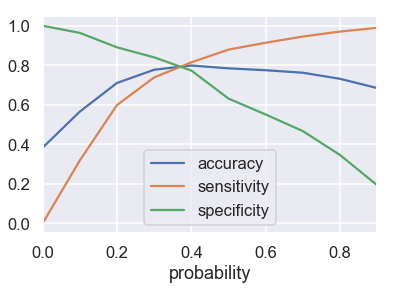

In [145]:
## Plot the graph to find the optimal cutoff point \ Start
sns.set_style("darkgrid")
sns.set_context('talk')
cutoff_df.plot.line(x='probability',y=['accuracy','sensitivity','specificity'])
plt.show()
## Plot the graph to find the optimal cutoff point \ End

<center><b>So we can see the optimal cutoff point is around 0.35</b></center>

In [146]:
# Map the final predicted value based on the optimal cutoff | Start
y_train_pred_final['predicted_final']=y_train_pred_final['Convert probability'].apply(lambda x: 1 if x>0.35 else 0)
# Map the final predicted value based on the optimal cutoff | End

In [147]:
y_train_pred_final.head()

,Lead ID,Converted,Convert probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final
0,4714,0,0.226467,0,1,1,1,0,0,0,0,0,0,0,0
1,5794,1,0.964870,1,1,1,1,1,1,1,1,1,1,1,1
2,876,1,0.075067,0,1,0,0,0,0,0,0,0,0,0,0
3,7768,0,0.116083,0,1,1,0,0,0,0,0,0,0,0,0
4,7896,0,0.310070,0,1,1,1,1,0,0,0,0,0,0,0


In [148]:
# Check the accuracy score | Start
accuracy4 = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted_final'])
# Check the accuracy score | End

round(accuracy4,2)

0.79

<b><center> We got accuracy score of - 0.79 in the 3rd run and the final accuracy is - 0.79, which is similar without much change </center></b>

In [149]:
## Get the confusion matrix | Start
confusion3 = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['predicted_final'])
confusion3
## Get the confusion matrix | End

array([[3054,  834],
       [ 461, 1950]])

In [150]:
# Predicted         Not Converted    Converted
# Actual
# Not Converted        3054            834
# Converted            461            1950

In [151]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.81

In [153]:
# Let us calculate specificity
round(TN / float(TN+FP),2)

0.79

In [154]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.21450617283950618


In [155]:
# Positive predictive value 
print (TP / float(TP+FP))  ## This is also Precision for us

0.7004310344827587


<center><b> We know this is also Precision, so Precision  = 0.7004310344827587 </b></center>

In [156]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8688477951635847


In [157]:
# Recall
print (TP / float(TP+ FN))

0.8087930319369556


<center><b> We know this is also Recall, so Recall  = 0.7986314760508308 </b></center>

In [158]:
## Building precision and recall curve | Start
precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'],y_train_pred_final['Convert probability'])
## Building precision and recall curve | End

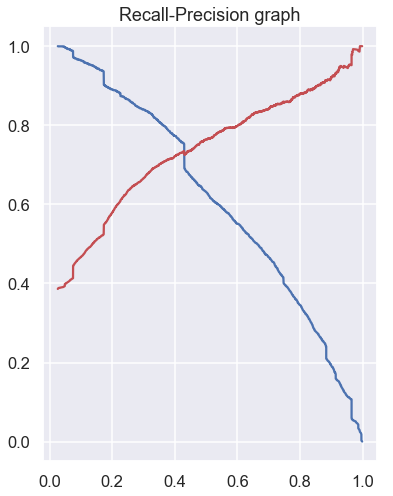

In [159]:
## Plot the graph to find the optimal cutoff point \ Start
plt.figure(figsize=(6,8))
sns.set_style("darkgrid")
sns.set_context('talk')
plt.plot(thresholds, recall[:-1], "b-")
plt.plot(thresholds, precision[:-1], "r-")
plt.title('Recall-Precision graph')
plt.show()
## Plot the graph to find the optimal cutoff point \ End

<b> <center> So we have the following metrics after the optimal cutoff </center> </b>
<br>
<ul>
    <li> <b> Accuracy: </b> 0.79 </li>
    <li> <b> Specificity: </b> 0.77 </li>
    <li> <b> Sensitivity: </b> 0.8 </li>
</ul>

## Prediction on Test set

In [160]:
## Get the test data ready | Start
X_test = X_test[rfe_col]
X_test.head()
## Get the test data ready | End

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
9122,-0.886780,0,0,0,0,0,0,0,1,0,0
4366,-0.735618,0,0,0,0,0,0,0,0,0,0
4044,-0.886780,0,0,0,0,0,0,1,0,0,0
5527,-0.886780,0,0,0,0,0,0,0,1,0,0
2752,-0.779077,0,0,0,0,0,0,0,0,0,0


In [161]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 9122 to 5351
Data columns (total 11 columns):
Total Time Spent on Website                      2700 non-null float64
Lead Source_Direct Traffic                       2700 non-null uint8
Lead Source_Organic Search                       2700 non-null uint8
Lead Source_Reference                            2700 non-null uint8
Lead Source_Welingak Website                     2700 non-null uint8
Last Activity_Email Bounced                      2700 non-null uint8
Last Activity_Had a Phone Conversation           2700 non-null uint8
Last Activity_SMS Sent                           2700 non-null uint8
Last Notable Activity_Modified                   2700 non-null uint8
Last Notable Activity_Olark Chat Conversation    2700 non-null uint8
Last Notable Activity_Unreachable                2700 non-null uint8
dtypes: float64(1), uint8(10)
memory usage: 68.6 KB


In [162]:
## Add the constant and predict the values | Start
X_test_sm = sm.add_constant(X_test)
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]
## Add the constant and predict the values | End

9122    0.075067
4366    0.196014
4044    0.430158
5527    0.075067
2752    0.189184
4165    0.646792
8744    0.079143
1600    0.845255
7642    0.767110
4741    0.063306
dtype: float64

In [163]:
## Converting to dataframe | Start
y_test_pred_df = pd.DataFrame(y_test_pred)
## Converting to dataframe | End

In [164]:
## Converting to dataframe | Start
y_test_df = pd.DataFrame(y_test)
## Converting to dataframe | End

## Add the leadID from index | Start
y_test_df['Lead ID'] = y_test_df.index

In [165]:
y_test_df.head()

,Converted,Lead ID
9122,0,9122
4366,0,4366
4044,1,4044
5527,0,5527
2752,0,2752


In [166]:
y_test_pred_df.head()

,0
9122,0.075067
4366,0.196014
4044,0.430158
5527,0.075067
2752,0.189184


In [167]:
## Remove the index from the dataframes | Start

y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

## Remove the index from the dataframes | End

In [168]:
# Concat y_test_df and y_test_pred_df | Start
y_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
# Concat y_test_df and y_test_pred_df | End

In [169]:
## Rename the column 0 | Start
y_pred_final=y_pred_final.rename(columns={0:'Probability'})
## Rename the column 0 | End

In [170]:
y_pred_final.head()

,Converted,Lead ID,Probability
0,0,9122,0.075067
1,0,4366,0.196014
2,1,4044,0.430158
3,0,5527,0.075067
4,0,2752,0.189184


In [171]:
#Rearrange the columns | Start
y_pred_final = y_pred_final.reindex_axis(['Lead ID','Converted','Probability'], axis=1)
#Rearrange the columns | End

In [172]:
# Map the final predicted value based on the optimal cutoff | Start
y_pred_final['predicted_final']=y_pred_final['Probability'].apply(lambda x: 1 if x>0.35 else 0)
# Map the final predicted value based on the optimal cutoff | End
y_pred_final.head()

,Lead ID,Converted,Probability,predicted_final
0,9122,0,0.075067,0
1,4366,0,0.196014,0
2,4044,1,0.430158,1
3,5527,0,0.075067,0
4,2752,0,0.189184,0


#### Accuracy Score of the test data

In [173]:
round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['predicted_final']),2)

0.78

<center> <b> We got accuracy score of - 0.7871090649309415 in the 3rd run and the final accuracy was - 0.7944118113986347 and accuracy of prediction in the test data is 0.7818518518518518 which is similar without much change </b> </center>

In [174]:
## Create the confusion matrix | Start
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['predicted_final'])
confusion4
## Create the confusion matrix | End

array([[1294,  383],
       [ 206,  817]])

In [175]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [176]:
# Sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.8

In [177]:
# Specificity of our logistic regression model
round(TN / float(TN+FP),2)

0.77

In [178]:
## Positive predictive value or Precision of our logistic regression model
print (TP / float(TP+FP))  

0.6808333333333333


In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8626666666666667


In [180]:
# Recall
print (TP / float(TP+ FN))

0.7986314760508308


<b> <center> So we have the following metrics after prediction done on the test data </center> </b>
<br>
<ul>
    <li> <b> Accuracy: </b> 0.78 </li>
    <li> <b> Specificity: </b> 0.77 </li>
    <li> <b> Sensitivity: </b> 0.8 </li>
</ul>

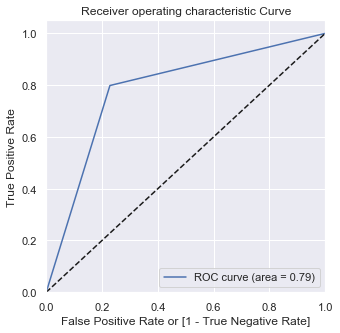

In [181]:
### Plot the ROC Curve for the predicted and the actual values of Test Data| Start
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final['Converted'], y_pred_final['predicted_final'], drop_intermediate = False )
draw_roc(y_pred_final['Converted'], y_pred_final['predicted_final'])
### Plot the ROC Curve for the predicted and the actual values of Test Data| End

<center> Thus we can see <b> AUC = 0.79 </b> for the above curve, which can be interpreted as a good score as it is near to 1.</center>

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final['Converted'], y_pred_final['predicted_final']))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1677
           1       0.68      0.80      0.74      1023

   micro avg       0.78      0.78      0.78      2700
   macro avg       0.77      0.79      0.77      2700
weighted avg       0.79      0.78      0.78      2700



#### To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [183]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76692564 0.76974416 0.79023307 0.79087875 0.79888889 0.80645161
 0.81465039 0.81535039 0.83018868 0.83092325]
0.8014234833760426


<center > Our model performs good here with an <b> mean accuracy score of 0.8014234833760426 </b> </center>

## Calculating Lead score for the entire dataset

### Lead Score = 100 * ConversionProbability

In [184]:
## Get the test data copy | Start
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()
## Get the test data copy | End

,Lead ID,Converted,Probability,predicted_final
0,9122,0,0.075067,0
1,4366,0,0.196014,0
2,4044,1,0.430158,1
3,5527,0,0.075067,0
4,2752,0,0.189184,0


In [185]:
# Rename the columns to make the columns name same as the train dataset | Start
leads_test_pred=leads_test_pred.rename(columns={'Probability':'Convert probability'})
# Rename the columns to make the columns name same as the train dataset | Start

In [186]:
leads_test_pred.head()

,Lead ID,Converted,Convert probability,predicted_final
0,9122,0,0.075067,0
1,4366,0,0.196014,0
2,4044,1,0.430158,1
3,5527,0,0.075067,0
4,2752,0,0.189184,0


In [187]:
## Get the train data copy | Start
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()
## Get the train data copy | End

,Lead ID,Converted,Convert probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final
0,4714,0,0.226467,0,1,1,1,0,0,0,0,0,0,0,0
1,5794,1,0.964870,1,1,1,1,1,1,1,1,1,1,1,1
2,876,1,0.075067,0,1,0,0,0,0,0,0,0,0,0,0
3,7768,0,0.116083,0,1,1,0,0,0,0,0,0,0,0,0
4,7896,0,0.310070,0,1,1,1,1,0,0,0,0,0,0,0


In [188]:
## We only need Lead ID, Converted, Convert Probability, predicted_final, so we drop others | Start
leads_train_pred = leads_train_pred[['Lead ID','Converted','Convert probability','predicted_final']]
## We only need Lead ID, Converted, Convert Probability, predicted_final, so we drop others | End

In [189]:
leads_train_pred.head()

,Lead ID,Converted,Convert probability,predicted_final
0,4714,0,0.226467,0
1,5794,1,0.964870,1
2,876,1,0.075067,0
3,7768,0,0.116083,0
4,7896,0,0.310070,0


In [190]:
## Lets merge the two data set along the rows using append | Start
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()
## Lets merge the two data set along the rows using append | End

,Lead ID,Converted,Convert probability,predicted_final
0,4714,0,0.226467,0
1,5794,1,0.964870,1
2,876,1,0.075067,0
3,7768,0,0.116083,0
4,7896,0,0.310070,0


In [191]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6299, 4)
(2700, 4)
(8999, 4)


In [192]:
# Calculating the Lead Score value | Lead Score = 100 * Conversion_Prob | Start
lead_full_pred['Lead_Score'] = lead_full_pred['Convert probability'].apply(lambda x : round(x*100))
lead_full_pred.head()
# Calculating the Lead Score value | Lead Score = 100 * Conversion_Prob | Start


,Lead ID,Converted,Convert probability,predicted_final,Lead_Score
0,4714,0,0.226467,0,23
1,5794,1,0.964870,1,96
2,876,1,0.075067,0,8
3,7768,0,0.116083,0,12
4,7896,0,0.310070,0,31


In [193]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
0,660737,0,-1.086838,-0.886780,-1.205023,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,0.651291,0.386759,0.122775,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,-0.391586,2.007969,-0.142784,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,-0.739212,-0.310475,-0.673904,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,660681,1,-0.391586,1.811459,-0.673904,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [194]:
## Now we have to add the Lead Number to lead_full_pred dataset so that we can identify the Leads | Start

## Create index with Lead ID | Start
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
## Create index with Lead ID | End

## Get the Lead Number from main dataset | Start
df_Leads = df[['Lead Number']]
## Get the Lead Number from main dataset | End


## Concat the two datasets | Start
leadScore = pd.concat([lead_full_pred,df_Leads],axis=1)
## Concat the two datasets | End

## Reallign the columns for easy readibility | Start
leadScore = leadScore.reindex_axis(['Lead Number',
                                    'Converted',
                                    'Convert probability',
                                    'predicted_final',
                                    'Lead_Score'], axis=1)
## Reallign the columns for easy readibility | End

## Now we have to add the Lead Number to lead_full_pred dataset so that we can identify the Leads | End


In [195]:
leadScore.head()

,Lead Number,Converted,Convert probability,predicted_final,Lead_Score
0,660737,0,0.075067,0,8
1,660728,0,0.350267,1,35
2,660727,1,0.686814,1,69
3,660719,0,0.075487,0,8
4,660681,1,0.553776,1,55


In [196]:
leadScore.shape

(8999, 5)

## Now we can determine the feature importance

In [197]:
## Select our paramters | Start
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params
## Select our paramters | End

Total Time Spent on Website                      1.01
Lead Source_Direct Traffic                      -0.58
Lead Source_Organic Search                      -0.34
Lead Source_Reference                            3.59
Lead Source_Welingak Website                     5.84
Last Activity_Email Bounced                     -1.09
Last Activity_Had a Phone Conversation           1.66
Last Activity_SMS Sent                           1.28
Last Notable Activity_Modified                  -0.95
Last Notable Activity_Olark Chat Conversation   -1.41
Last Notable Activity_Unreachable                1.43
dtype: float64

In [198]:
## Calculate the feature importance | Start
featureImportance = new_params
featureImportance = 100*(featureImportance / max(featureImportance))
featureImportance
## Calculate the feature importance | End

Total Time Spent on Website                      17.31
Lead Source_Direct Traffic                       -9.87
Lead Source_Organic Search                       -5.84
Lead Source_Reference                            61.55
Lead Source_Welingak Website                    100.00
Last Activity_Email Bounced                     -18.75
Last Activity_Had a Phone Conversation           28.51
Last Activity_SMS Sent                           21.97
Last Notable Activity_Modified                  -16.22
Last Notable Activity_Olark Chat Conversation   -24.07
Last Notable Activity_Unreachable                24.55
dtype: float64

In [199]:
# Sort the features by importance | Start
sortedFeatureImp = featureImportance.to_frame().sort_values(by=0,ascending=False).reset_index().rename(columns={'index':'Columns',0:'Importance'})
sortedFeatureImp.head(3)
# Sort the features by importance | End

,Columns,Importance
0,Lead Source_Welingak Website,100.00
1,Lead Source_Reference,61.55
2,Last Activity_Had a Phone Conversation,28.51


In [200]:
## Get the actual Leads from the data | Start
hotLeads = len(leadScore[leadScore.Converted==1])
## Get the actual Leads from the data | End

In [201]:
hotLeads

3434

In [202]:
## Get the predicted Leads | Start
modelHotLeads = len(leadScore[(leadScore.predicted_final==1)&(leadScore.Converted==1)])
## Get the predicted Leads | End

In [203]:
modelHotLeads

2767

In [204]:
#Percentage of the identified hot leads by the model, which are actually hot leads| Start
round(modelHotLeads/hotLeads *100,2)
#Percentage of the identified hot leads by the model, which are actually hot leads | End

80.58

<center> <b> Basically the SENSITIVITY of the model is also calculated as 0.8 or 80%, so we are good here based on the expectation from the management.</b> </center>

In [205]:
## We get the Leads with more than 80% lead score. | Start
leadScore80=leadScore[(leadScore.Lead_Score >= 80)&(leadScore.predicted_final==1)&(leadScore.Converted==1)].sort_values(by='Lead_Score',ascending=False)
## We get the Leads with more than 80% lead score. | End

leadScore80.head(10)

,Lead Number,Converted,Convert probability,predicted_final,Lead_Score
2594,634647,1,1.00,1,100
5872,604887,1,1.00,1,100
4680,614849,1,1.00,1,100
2457,636110,1,1.00,1,100
2458,636092,1,1.00,1,100
2461,636059,1,1.00,1,100
4675,614906,1,1.00,1,100
8592,584198,1,1.00,1,100
2495,635776,1,1.00,1,100
3615,625862,1,1.00,1,100


In [206]:
leadScore80.shape

(1212, 5)

<center> <b> <font color=blue> These are the set of Leads that has a lead score >= 80%, so now the team can focus on these leads to be more productive.</font> </b> </center>

<b> <font size=3px color=green> Model Characteristics: </font> </b>

<ul>
    <li> <font color=blue>All the identified variables have p values < 0.05 </font> </li>
    <li> <font color=blue>All the identified variables VIF very low, so there is no multicollinerity among them < 0.05 </font> </li>
    <li> <font color=blue>The overall accuracy is 0.78, which can be though as a accuracy good score </font> </li>
    <li> <font color=blue><b> Accuracy of the Train dataset:</b> 0.79   </font> </li>
    <li> <font color=blue><b> Sensitivity of the Train dataset:</b> 0.8  </font> </li>
    <li> <font color=blue><b> Specificity of the Train dataset:</b> 0.77  </font> </li>
    <li> <font color=blue><b> AUC of the Train dataset:</b> 0.86  </font> </li>
    <li> <font color=blue><b> Accuracy of the Test dataset:</b> 0.78, after cross validation we found that the mean accuracy is 0.8, which can be though of a good score  </font> </li>
    <li> <font color=blue><b> Sensitivity of the Test dataset:</b> 0.8  </font> </li>
    <li> <font color=blue><b> Specificity of the Test dataset:</b> 0.77  </font> </li>
    <li> <font color=blue><b> AUC of the Test dataset:</b> 0.79  </font> </li>
</ul>

<b> <font size=2px color=indigo> Identified top 3 features with feature scores: </font> </b>
1. Lead Source_Welingak Website	- 100.00
2. Lead Source_Reference - 61.55
3. Last Activity_Had a Phone Conversation - 28.51

<br><br>
 Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected. 